<a href="https://colab.research.google.com/github/NehaCkumari/Risk_Analysis_EDA/blob/master/Previous_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ls

drive/  sample_data/


In [3]:
cd /content/drive/My Drive/EDA - Assignment

/content/drive/.shortcut-targets-by-id/1iF6BnXXNRwBAOwLTpGYswYQWdn-MjW8t/EDA - Assignment


# Import libraries

In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load description dataset
<b> It will help to understand the meaning of the columns in application dataset</b>

In [5]:
columnsdescription=pd.read_csv("columns_description.csv", encoding= 'unicode_escape')

In [6]:
columnsdescription.head(2)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN


In [7]:
#drop index
columnsdescription = columnsdescription.loc[:, ~columnsdescription.columns.str.contains('^Unnamed')]

In [8]:
columnsdescription.head(2)

,Table,Row,Description,Special
0,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN


In [9]:
columnsdescription["Table"].value_counts()

application_data            122
previous_application.csv     38
Name: Table, dtype: int64

In [10]:
columnsdescription=columnsdescription[columnsdescription["Table"]=="previous_application.csv"]

In [11]:
columnsdescription.drop(["Table"],axis=1,inplace=True)

In [12]:
columnsdescription=columnsdescription.set_index('Row') 
columnsdescription=columnsdescription.T

In [13]:
#print string upto 500 character
pd.options.display.max_colwidth = 500

In [14]:
columnsdescription

Row,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NFLAG_MICRO_CASH,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
Description,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)",ID of loan in our sample,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application",Annuity of previous application,For how much credit did client ask on the previous application,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT",Down payment on the previous application,Goods price of good that client asked for (if applicable) on the previous application,On which day of the week did the client apply for previous application,Approximately at what day hour did the client apply for the previous application,Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract,Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice,Flag Micro finance loan,Down payment rate normalized on previous credit,Interest rate normalized on previous credit,Interest rate normalized on previous credit,Purpose of the cash loan,"Contract status (approved, cancelled, ...) of previous application",Relative to current application when was the decision about previous application made,Payment method that client chose to pay for the previous application,Why was the previous application rejected,Who accompanied client when applying for the previous application,Was the client old or new client when applying for the previous application,What kind of goods did the client apply for in the previous application,"Was the previous application for CASH, POS, CAR,",Was the previous application x-sell o walk-in,Through which channel we acquired the client on the previous application,Selling area of seller place of the previous application,The industry of the seller,Term of previous credit at application of the previous application,Grouped interest rate into small medium and high of the previous application,Detailed product combination of the previous application,Relative to application date of current application when was the first disbursement of the previous application,Relative to application date of current application when was the first due supposed to be of the previous application,Relative to application date of current application when was the first due of the previous application,Relative to application date of current application when was the last due date of the previous application,Relative to application date of current application when was the expected termination of the previous application,Did the client requested insurance during the previous application
Special,hashed,hashed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rounded,NaN,NaN,NaN,normalized,normalized,normalized,NaN,NaN,time only relative to the application,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Load previous application dataset

In [15]:
previous_application=pd.read_csv("previous_application.csv")

In [16]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
previous_application.shape

(1670214, 37)

In [18]:
previous_application["SK_ID_PREV"].nunique()

1670214

<b> The columns having ids are unique and not going to be in any help for analysis. so, droped</b> 

In [19]:
previous_application["SK_ID_CURR"].nunique()

338857

In [20]:
previous_application.drop(["SK_ID_PREV","SK_ID_CURR"],axis=1,inplace=True)

<b> Target is a categorical ordinal data. for correlation between target and numerical features, target must be in numerical form(labelled)</b>
Let's make another column named as "TARGET" for the same purpose.  

In [21]:
previous_application["TARGET"]=previous_application["NAME_CONTRACT_STATUS"]

In [22]:
previous_application["NAME_CONTRACT_STATUS"].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [23]:
previous_application["TARGET"]=previous_application["TARGET"].replace("Approved",0)
previous_application["TARGET"]=previous_application["TARGET"].replace("Canceled",1)
previous_application["TARGET"]=previous_application["TARGET"].replace("Refused",2)
previous_application["TARGET"]=previous_application["TARGET"].replace("Unused offer",3)

In [24]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   NAME_CONTRACT_TYPE           1670214 non-null  object 
 1   AMT_ANNUITY                  1297979 non-null  float64
 2   AMT_APPLICATION              1670214 non-null  float64
 3   AMT_CREDIT                   1670213 non-null  float64
 4   AMT_DOWN_PAYMENT             774370 non-null   float64
 5   AMT_GOODS_PRICE              1284699 non-null  float64
 6   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 7   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 8   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 9   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 10  RATE_DOWN_PAYMENT            774370 non-null   float64
 11  RATE_INTEREST_PRIMARY        5951 non-null     float64
 12  RATE_INTEREST_PRIVILEGED     5951 non-null

# Missing Values

In [25]:
# examin missing values
def missing_vals(previous_application):
    mis_val=previous_application.isnull().sum()
    mis_per=100*mis_val/len(previous_application)
    mis_table=pd.concat([mis_val,mis_per],axis=1)
    mis_table=mis_table.rename(columns={0:'missing_values',1:'missing_percent'})
    mis_table=mis_table[mis_table.iloc[:,1] != 0].sort_values('missing_percent',ascending=False).round(1)
    return mis_table
missing_dataset_app=missing_vals(previous_application)

In [26]:
missing_dataset_app

,missing_values,missing_percent
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3


In [27]:
previous_application["NAME_CONTRACT_STATUS"].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

<b> columns having 99% missing value is of no use for the analysis. so drop them</b>

In [28]:
previous_application.drop(["RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED"],axis=1,inplace=True)

<b> Let's divide dataset into categorical, integer and float for our further analysis </b>

In [29]:
cat =[col for col in previous_application.columns if previous_application[col].dtype==np.object]
num_int =[col for col in previous_application.columns if previous_application[col].dtype==np.int]
num_float =[col for col in previous_application.columns if previous_application[col].dtype==np.float]

In [30]:
print(len(cat),len(num_float),len(num_int))

16 13 5


In [31]:
previous_application[cat].head()

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest
1,Cash loans,THURSDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low
2,Cash loans,TUESDAY,Y,XNA,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high
3,Cash loans,MONDAY,Y,XNA,Approved,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
4,Cash loans,THURSDAY,Y,Repairs,Refused,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,high,Cash Street: high


In [32]:
previous_application[num_float].head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1730.430,17145.0,17145.0,0.0,17145.0,0.0,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,25188.615,607500.0,679671.0,NaN,607500.0,NaN,36.0,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,15060.735,112500.0,136444.5,NaN,112500.0,NaN,12.0,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,47041.335,450000.0,470790.0,NaN,450000.0,NaN,12.0,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,31924.395,337500.0,404055.0,NaN,337500.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
previous_application[num_int].head()

,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,TARGET
0,15,1,-73,35,0
1,11,1,-164,-1,0
2,11,1,-301,-1,0
3,7,1,-512,-1,0
4,9,1,-781,-1,2


# Filling missing values

categorical variables : filled with "not_known".
Numerical variables : filled with zero.</br>
<b>Reasons : Droping the rows with null values in case of numerical data is not a good option in this case. As we have imbalanced dataset. Droping rows might lead to loss of information for a perticular case. Also, for categorical data it is not advisable to fill null values with mode for the same reason</b>

In [34]:
previous_application[cat] = previous_application[cat].replace(np.nan,"not_known", regex=True).copy()

In [35]:
previous_application[cat].isnull().sum()

NAME_CONTRACT_TYPE             0
WEEKDAY_APPR_PROCESS_START     0
FLAG_LAST_APPL_PER_CONTRACT    0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [36]:
previous_application[num_int].fillna(0)

,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,TARGET
0,15,1,-73,35,0
1,11,1,-164,-1,0
2,11,1,-301,-1,0
3,7,1,-512,-1,0
4,9,1,-781,-1,2
...,...,...,...,...,...
1670209,12,1,-544,43,0
1670210,15,1,-1694,43,0
1670211,12,1,-1488,1370,0
1670212,9,1,-1185,-1,0


In [37]:
previous_application[num_int].isnull().sum()

HOUR_APPR_PROCESS_START    0
NFLAG_LAST_APPL_IN_DAY     0
DAYS_DECISION              0
SELLERPLACE_AREA           0
TARGET                     0
dtype: int64

In [38]:
previous_application[num_float] = previous_application[num_float].fillna(0).copy()

In [39]:
previous_application[num_float].isnull().sum()

AMT_ANNUITY                  0
AMT_APPLICATION              0
AMT_CREDIT                   0
AMT_DOWN_PAYMENT             0
AMT_GOODS_PRICE              0
RATE_DOWN_PAYMENT            0
CNT_PAYMENT                  0
DAYS_FIRST_DRAWING           0
DAYS_FIRST_DUE               0
DAYS_LAST_DUE_1ST_VERSION    0
DAYS_LAST_DUE                0
DAYS_TERMINATION             0
NFLAG_INSURED_ON_APPROVAL    0
dtype: int64

# Outliers

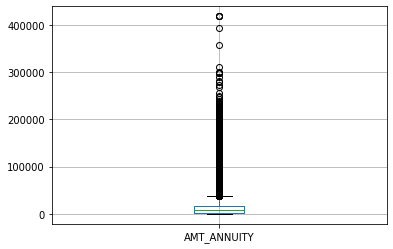

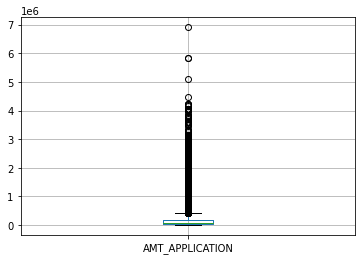

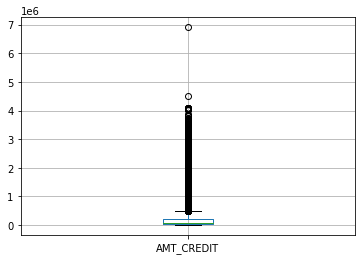

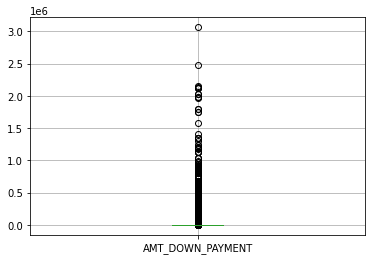

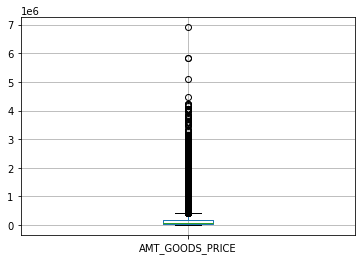

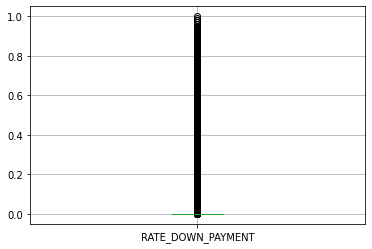

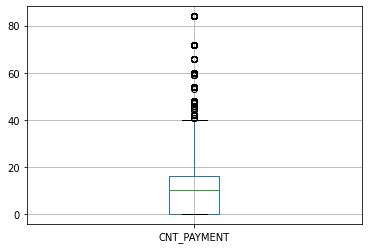

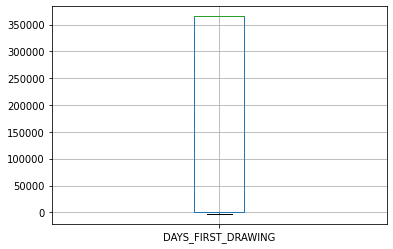

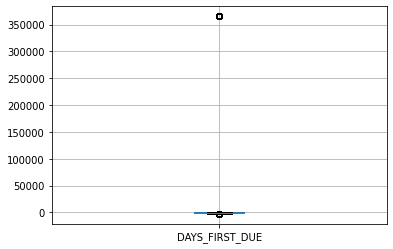

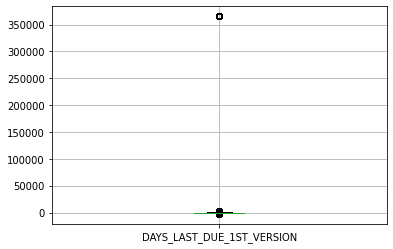

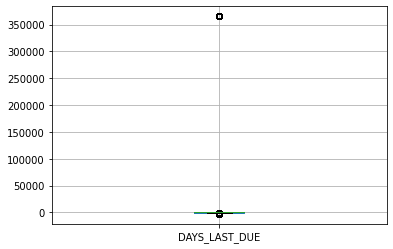

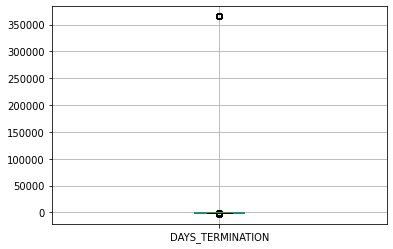

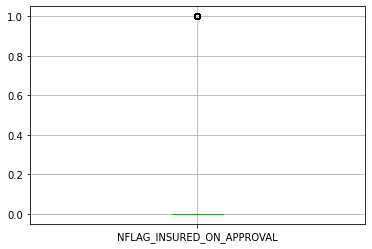

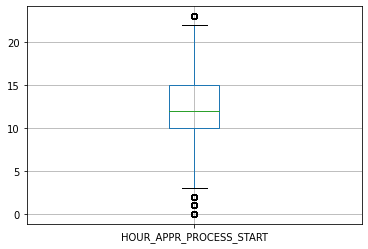

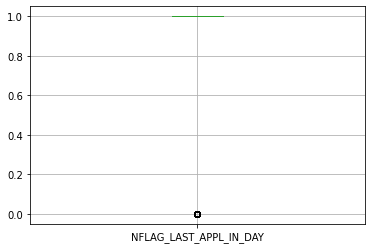

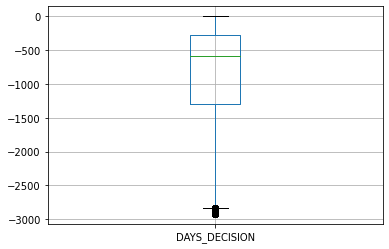

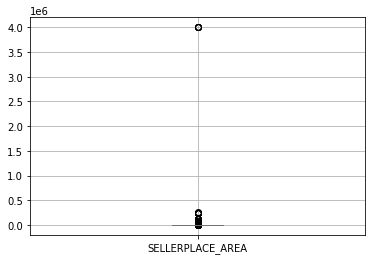

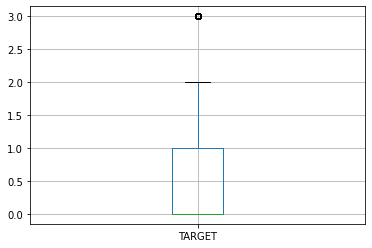

In [40]:
for column in previous_application[num_float+num_int]:
    plt.figure()
    previous_application[num_float+num_int].boxplot([column])

Not going to remove outliers in this case as it might have some information.

# Data Imbalance

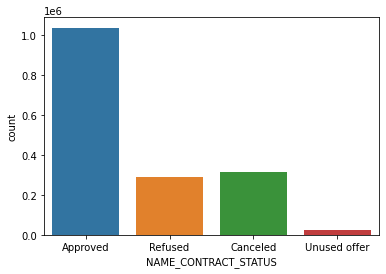

In [41]:
sns.countplot(x ='NAME_CONTRACT_STATUS', data = previous_application)

<b> The dataset is highly imbalanced. It need to be undersampled to get a better insight <b>

In [42]:
df_1 = previous_application[previous_application.NAME_CONTRACT_STATUS=="Unused offer"]
df_0 = previous_application[previous_application.NAME_CONTRACT_STATUS=="Canceled"].sample(len(df_1))
df_2 = previous_application[previous_application.NAME_CONTRACT_STATUS=="Refused"].sample(len(df_1))
df_3 = previous_application[previous_application.NAME_CONTRACT_STATUS=="Approved"].sample(len(df_1))

In [43]:
sample_application = df_1.append(df_0)
sample_application = sample_application.append(df_2)
sample_application = sample_application.append(df_3)

In [44]:
sample_application.reset_index(drop=True)

,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,Consumer loans,0.000,17950.5,17950.5,0.0,17950.5,MONDAY,19,Y,1,0.000000,XAP,Unused offer,-1141,Cash through the bank,CLIENT,not_known,Repeater,Mobile,XNA,XNA,Country-wide,25,Connectivity,0.0,XNA,POS mobile with interest,0.0,0.0,0.0,0.0,0.0,0.0,3
1,Consumer loans,0.000,23400.0,23400.0,0.0,23400.0,SATURDAY,9,Y,1,0.000000,XAP,Unused offer,-1412,Cash through the bank,CLIENT,Family,Repeater,Audio/Video,XNA,XNA,Country-wide,3500,Consumer electronics,0.0,XNA,POS household with interest,0.0,0.0,0.0,0.0,0.0,0.0,3
2,Consumer loans,0.000,113215.5,113215.5,0.0,113215.5,SUNDAY,12,Y,1,0.000000,XAP,Unused offer,-520,Cash through the bank,CLIENT,not_known,New,Computers,XNA,XNA,Country-wide,25,Connectivity,0.0,XNA,POS mobile with interest,0.0,0.0,0.0,0.0,0.0,0.0,3
3,Consumer loans,0.000,62860.5,62860.5,0.0,62860.5,FRIDAY,15,Y,1,0.000000,XAP,Unused offer,-518,Cash through the bank,CLIENT,not_known,Repeater,Computers,XNA,XNA,Country-wide,30,Connectivity,0.0,XNA,POS mobile with interest,0.0,0.0,0.0,0.0,0.0,0.0,3
4,Consumer loans,0.000,27666.0,27666.0,0.0,27666.0,THURSDAY,16,Y,1,0.000000,XAP,Unused offer,-357,Cash through the bank,CLIENT,not_known,Repeater,Mobile,XNA,XNA,Country-wide,30,Connectivity,0.0,XNA,POS mobile with interest,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105739,Consumer loans,8180.325,57150.0,54828.0,5715.0,57150.0,SUNDAY,12,Y,1,0.102806,XAP,Approved,-2112,Cash through the bank,XAP,Family,New,Consumer Electronics,POS,XNA,Stone,149,Consumer electronics,8.0,middle,POS household with interest,365243.0,-2066.0,-1856.0,-1856.0,-1853.0,0.0,0
105740,Cash loans,35590.500,450000.0,540301.5,0.0,450000.0,TUESDAY,9,Y,1,0.000000,XNA,Approved,-406,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-376.0,134.0,365243.0,365243.0,1.0,0
105741,Cash loans,26269.650,135000.0,135000.0,0.0,135000.0,WEDNESDAY,15,Y,1,0.000000,XNA,Approved,-586,Cash through the bank,XAP,not_known,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,6.0,high,Cash X-Sell: high,365243.0,-556.0,-406.0,-436.0,-423.0,0.0,0
105742,Consumer loans,16239.375,148455.0,137038.5,22500.0,148455.0,TUESDAY,15,Y,1,0.153596,XAP,Approved,-389,Cash through the bank,XAP,Unaccompanied,Repeater,Computers,POS,XNA,Regional / Local,1450,Consumer electronics,10.0,middle,POS household with interest,365243.0,-359.0,-89.0,-89.0,-83.0,1.0,0


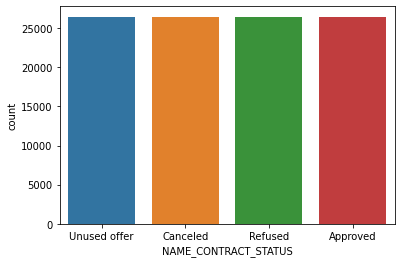

In [45]:
sns.countplot(x ='NAME_CONTRACT_STATUS', data =sample_application)

# Correlations

In [46]:
from scipy import stats

<b> 1. Correlation between target and features(numerical)</br></b>
spearman correlation</br>
<b> 2. Correlation between target and features(categorical)</br></b>
chi-square </br>

In [47]:
correlation_app=sample_application[num_int+num_float].corr(method='spearman').loc[["TARGET"]]

In [48]:
p_value=[stats.pearsonr(sample_application[column], sample_application['TARGET'])[1] for column in correlation_app.columns]

In [49]:
correlation_app.loc['P_value'] = p_value

In [50]:
correlation_app

,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,TARGET,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
TARGET,1.125650e-01,-2.792451e-02,-0.040432,1.923827e-01,1.0,-0.388777,0.075413,0.053295,-3.203370e-01,0.075434,-0.320838,-0.365083,-0.65632,0.68505,0.271369,0.433314,0.410923,-0.397138
P_value,1.910122e-309,1.063618e-19,0.114061,7.061221e-28,0.0,0.000000,0.252705,0.000091,2.853721e-136,0.258906,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000


In [51]:
correlation_app.shape

(2, 18)

In [52]:
correlation_appT = correlation_app.T
correlation_appT=correlation_appT[correlation_appT['P_value']<=0.001].T

In [53]:
correlation_app.shape

(2, 18)

In [54]:
correlation_appT.drop(["TARGET"],axis=1,inplace=True)

In [55]:
correlation_appT

,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,SELLERPLACE_AREA,AMT_ANNUITY,AMT_CREDIT,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
TARGET,1.125650e-01,-2.792451e-02,1.923827e-01,-0.388777,0.053295,-3.203370e-01,-0.320838,-0.365083,-0.65632,0.68505,0.271369,0.433314,0.410923,-0.397138
P_value,1.910122e-309,1.063618e-19,7.061221e-28,0.000000,0.000091,2.853721e-136,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000


The p_value for all the features(numerical) are approx zero but the correlation coefficients are not that good. Let's plot box plot for columns with a reasonable correlation coefficient values.

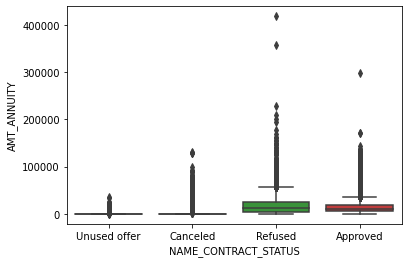

In [56]:
sns.boxplot(y="AMT_ANNUITY", x="NAME_CONTRACT_STATUS", data=sample_application)

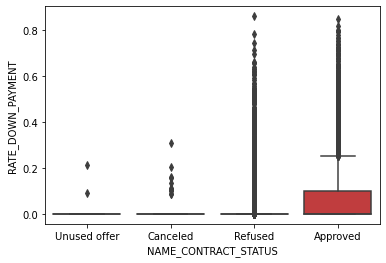

In [57]:
sns.boxplot(y="RATE_DOWN_PAYMENT", x="NAME_CONTRACT_STATUS", data=sample_application)

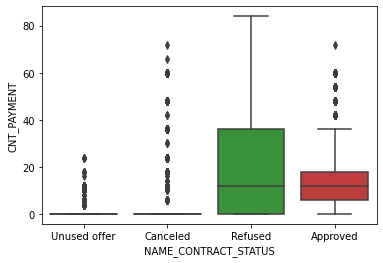

In [58]:
sns.boxplot(y="CNT_PAYMENT", x="NAME_CONTRACT_STATUS", data=sample_application)

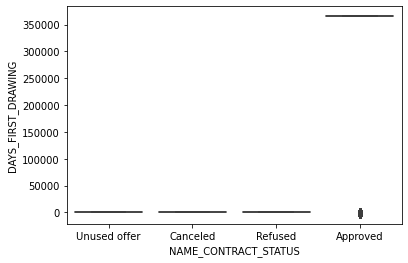

In [59]:
sns.boxplot(y="DAYS_FIRST_DRAWING", x="NAME_CONTRACT_STATUS", data=sample_application)

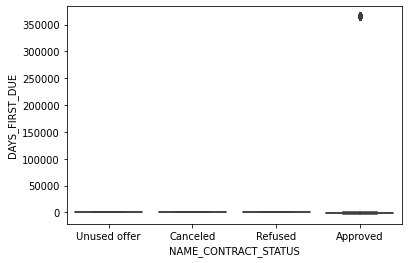

In [60]:
sns.boxplot(y="DAYS_FIRST_DUE", x="NAME_CONTRACT_STATUS", data=sample_application)

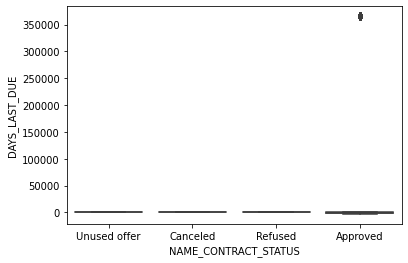

In [61]:
sns.boxplot(y="DAYS_LAST_DUE", x="NAME_CONTRACT_STATUS", data=sample_application)

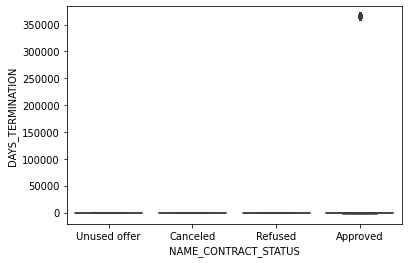

In [62]:
sns.boxplot(y="DAYS_TERMINATION", x="NAME_CONTRACT_STATUS", data=sample_application)

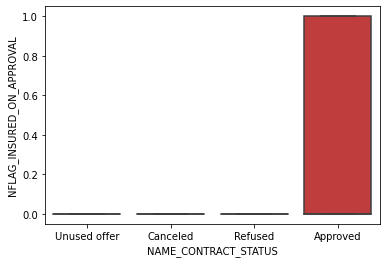

In [63]:
sns.boxplot(y="NFLAG_INSURED_ON_APPROVAL", x="NAME_CONTRACT_STATUS", data=sample_application)

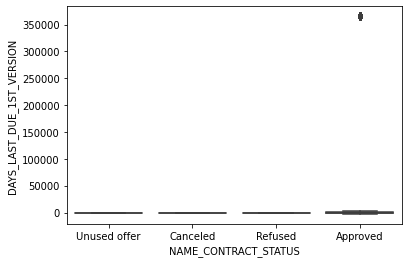

In [64]:
sns.boxplot(y="DAYS_LAST_DUE_1ST_VERSION", x="NAME_CONTRACT_STATUS", data=sample_application)

Even the correlation for these columns have shown some relation with target but it can not be seen clearly with the plot due to outliers.



<b>Bivarient analysis</b></br>



In [68]:
sample=sample_application[["NAME_CONTRACT_STATUS","AMT_ANNUITY","RATE_DOWN_PAYMENT","CNT_PAYMENT","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION","NFLAG_INSURED_ON_APPROVAL"]]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

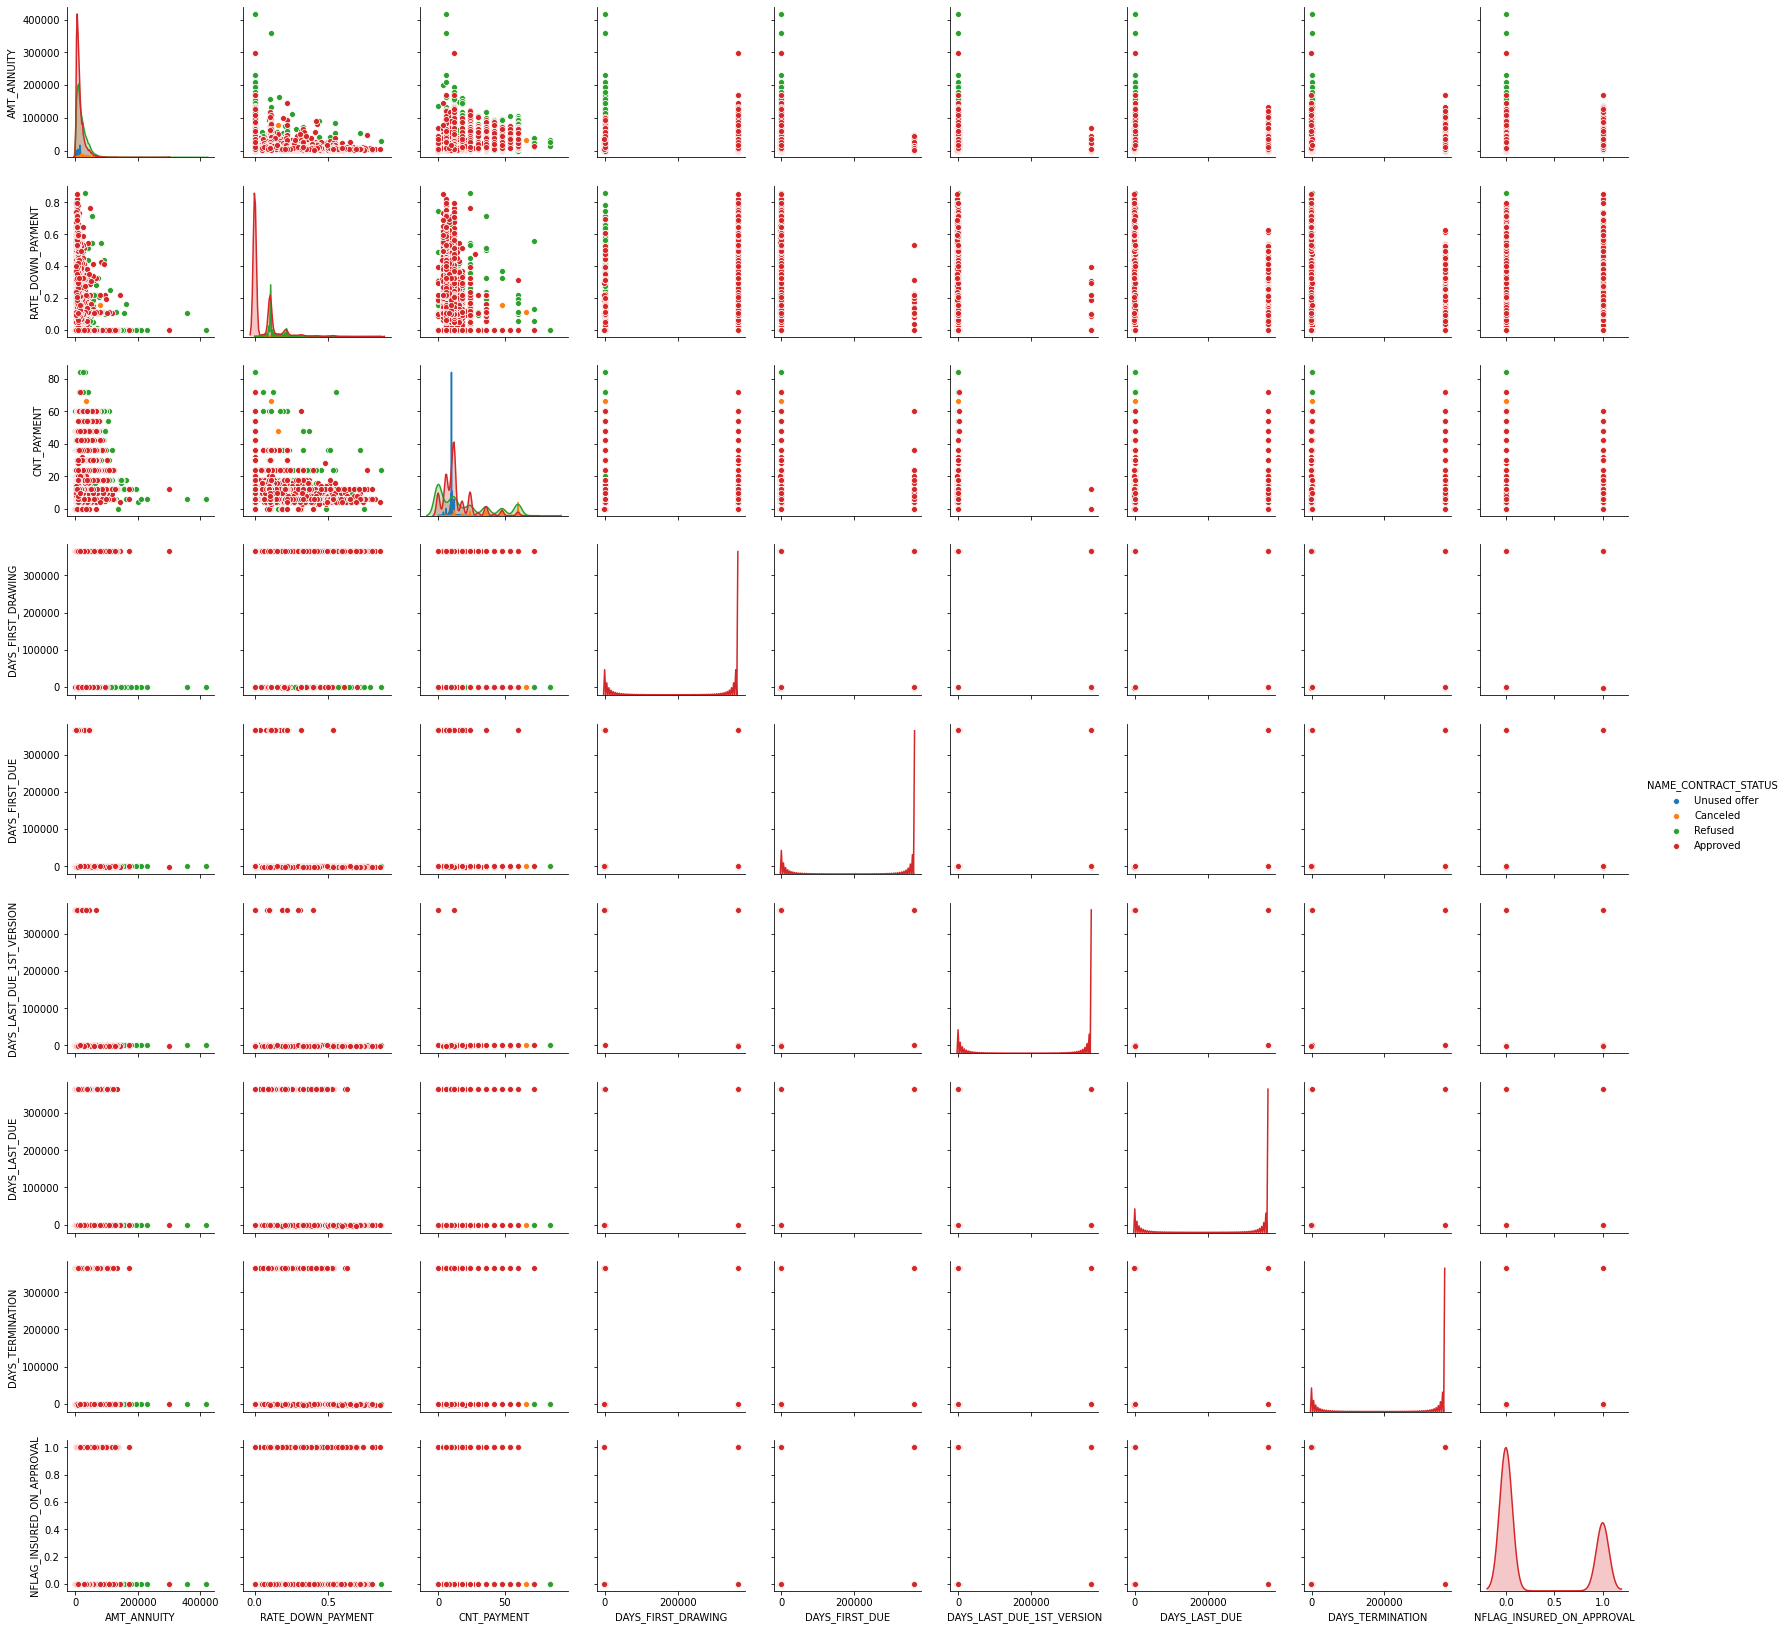

In [69]:
sns.pairplot(sample,hue="NAME_CONTRACT_STATUS")

from the plots, it is clear that "AMT_ANNUITY" is a good feature to detect refused offer and approved offer.

In [70]:
from scipy.stats import chi2


In [71]:
for column in sample_application[cat].columns:
  #Contingency Table
  contingency_table=pd.crosstab(sample_application["NAME_CONTRACT_STATUS"],sample_application[column])
  #print('contingency_table :-\n',contingency_table)
  #Observed Values
  Observed_Values = contingency_table.values 
  #print("Observed Values :-\n",Observed_Values)
  #Expected Values
  import scipy.stats
  b=scipy.stats.chi2_contingency(contingency_table)
  Expected_Values = b[3]
  #print("Expected Values :-\n",Expected_Values)
  #Degree of Freedom
  no_of_rows=len(contingency_table.iloc[0:2,0])
  no_of_columns=len(contingency_table.iloc[0,0:2])
  df=(no_of_rows-1)*(no_of_columns-1)
  #print("Degree of Freedom:-",df)
  #Significance Level 5%
  alpha=0.05
  #chi-square statistic - χ2
  from scipy.stats import chi2
  chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
  chi_square_statistic=chi_square[0]+chi_square[1]
  #print("chi-square statistic:-",chi_square_statistic)
  #critical_value
  critical_value=chi2.ppf(q=1-alpha,df=df)
  #print('critical_value:',critical_value)
  #p-value
  p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
  #print('p-value:',p_value)
  print(column)
  #compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
  if chi_square_statistic>=critical_value:
      print("chi_square : Reject H0,There is a relationship between 2 categorical variables")
  else:
      print("chi_square : Retain H0,There is no relationship between 2 categorical variables")
      
  if p_value<=alpha:
      print("p_value : Reject H0,There is a relationship between 2 categorical variables")
  else:
      print("p_value : Retain H0,There is no relationship between 2 categorical variables")
  print("---------------------------------------------------------------------------------")
  print("---------------------------------------------------------------------------------")

NAME_CONTRACT_TYPE
chi_square : Reject H0,There is a relationship between 2 categorical variables
p_value : Reject H0,There is a relationship between 2 categorical variables
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
WEEKDAY_APPR_PROCESS_START
chi_square : Reject H0,There is a relationship between 2 categorical variables
p_value : Reject H0,There is a relationship between 2 categorical variables
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
FLAG_LAST_APPL_PER_CONTRACT
chi_square : Reject H0,There is a relationship between 2 categorical variables
p_value : Reject H0,There is a relationship between 2 categorical variables
---------------------------------------------------------------------------------
---------------------------------------------------

From chi-square test, There are correlations between each categorical features and the target.

<b>Let's check through plots</b>

Text(0, 0.5, 'Frequency')

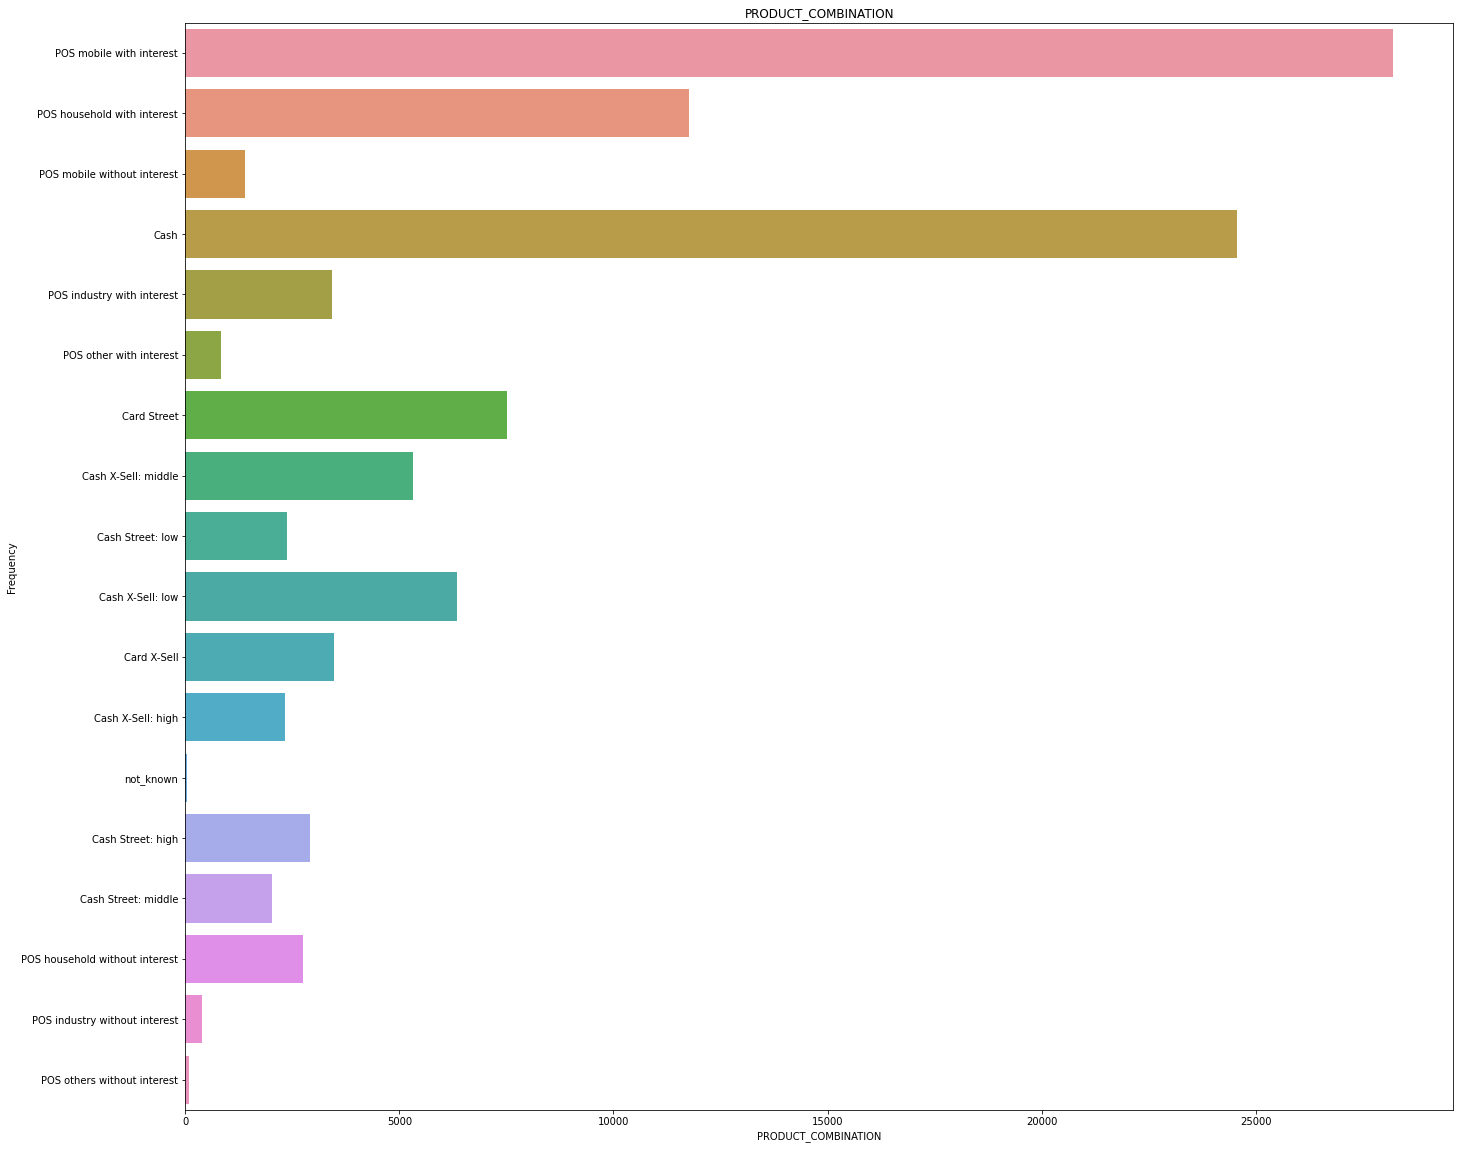

In [72]:
fig = plt.figure(figsize=(50,20)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
#ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
#df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
sns.countplot(y ='PRODUCT_COMBINATION', data = sample_application,ax=ax0)
ax0.set_title('PRODUCT_COMBINATION')
ax0.set_xlabel('PRODUCT_COMBINATION')
ax0.set_ylabel('Frequency')




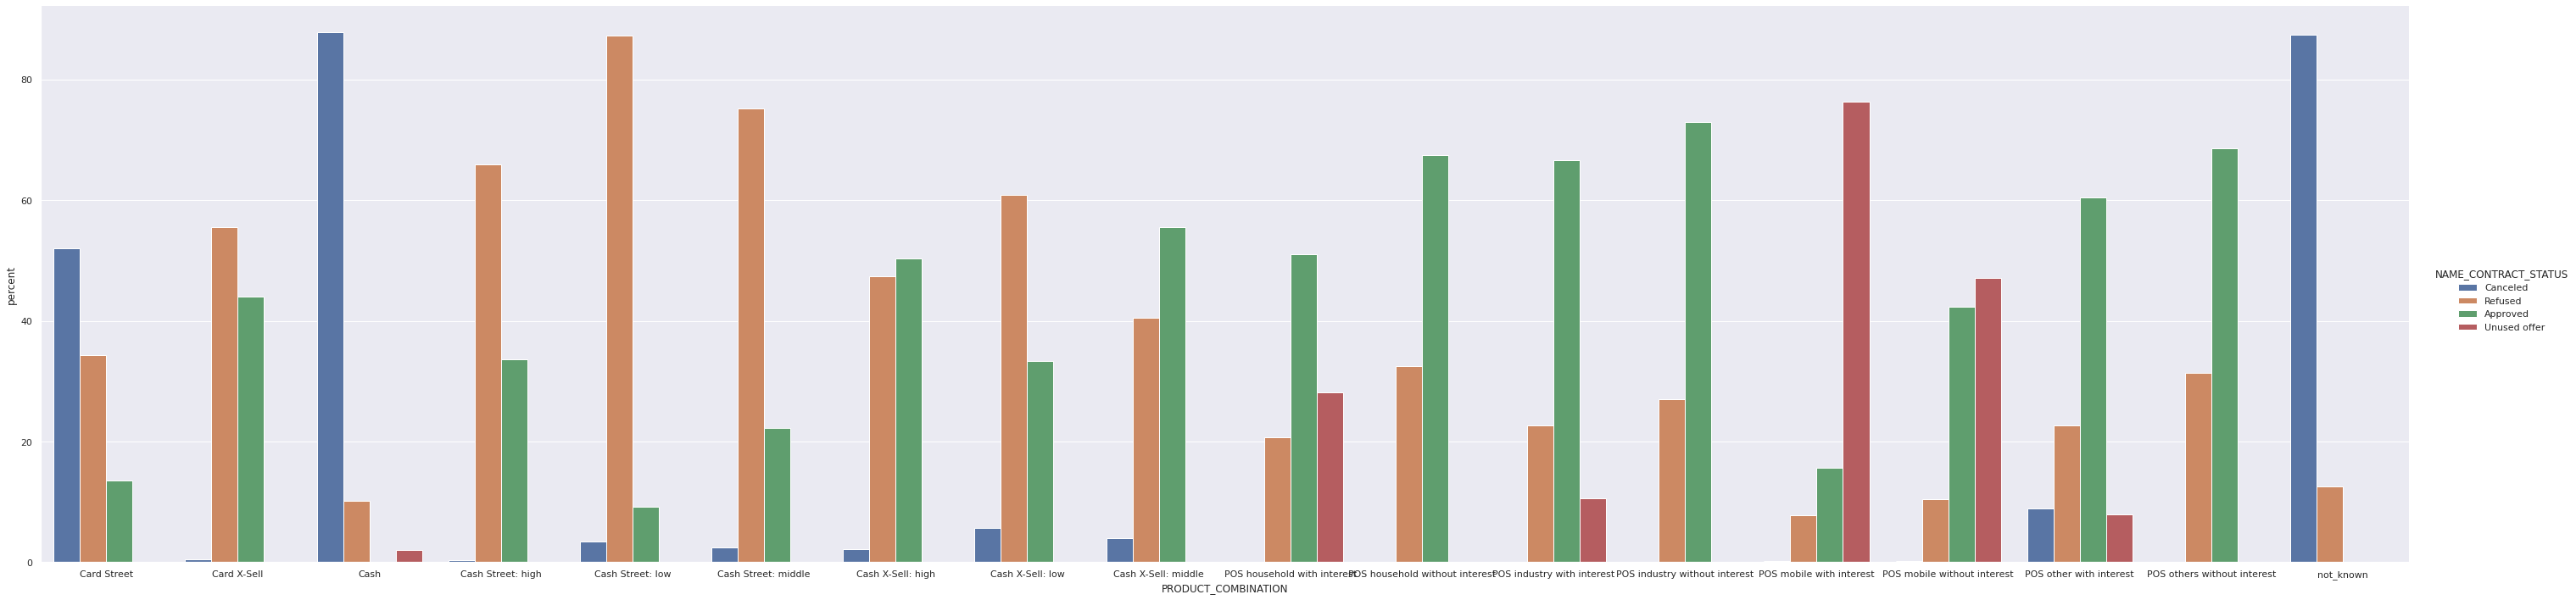

In [73]:

sns.set(color_codes=True)
x,y = 'PRODUCT_COMBINATION', 'NAME_CONTRACT_STATUS'
(sample_application.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,height=10, aspect=4,kind='bar'))

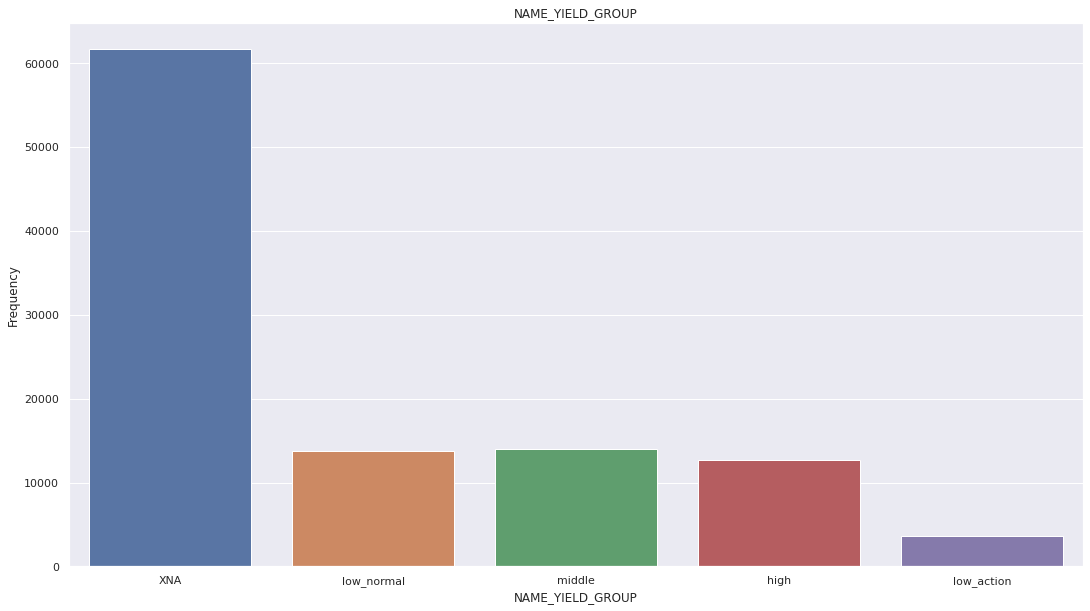

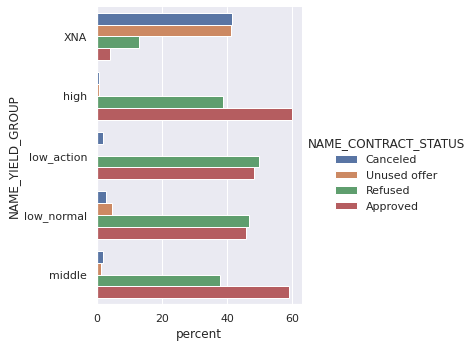

In [74]:
fig = plt.figure(figsize=(40,10)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
#ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
#df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
sns.countplot(x ='NAME_YIELD_GROUP', data = sample_application,ax=ax0)
ax0.set_title('NAME_YIELD_GROUP')
ax0.set_xlabel('NAME_YIELD_GROUP')
ax0.set_ylabel('Frequency')


sns.set(color_codes=True)
x,y = 'NAME_YIELD_GROUP', 'NAME_CONTRACT_STATUS'
(sample_application.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), y=x,x='percent',hue=y,kind='bar'))

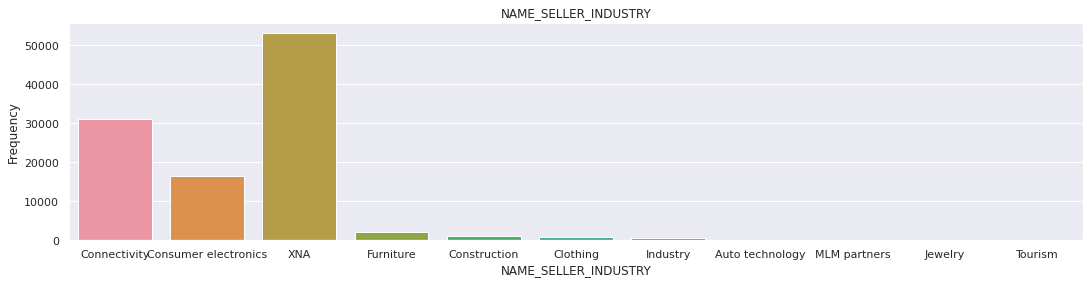

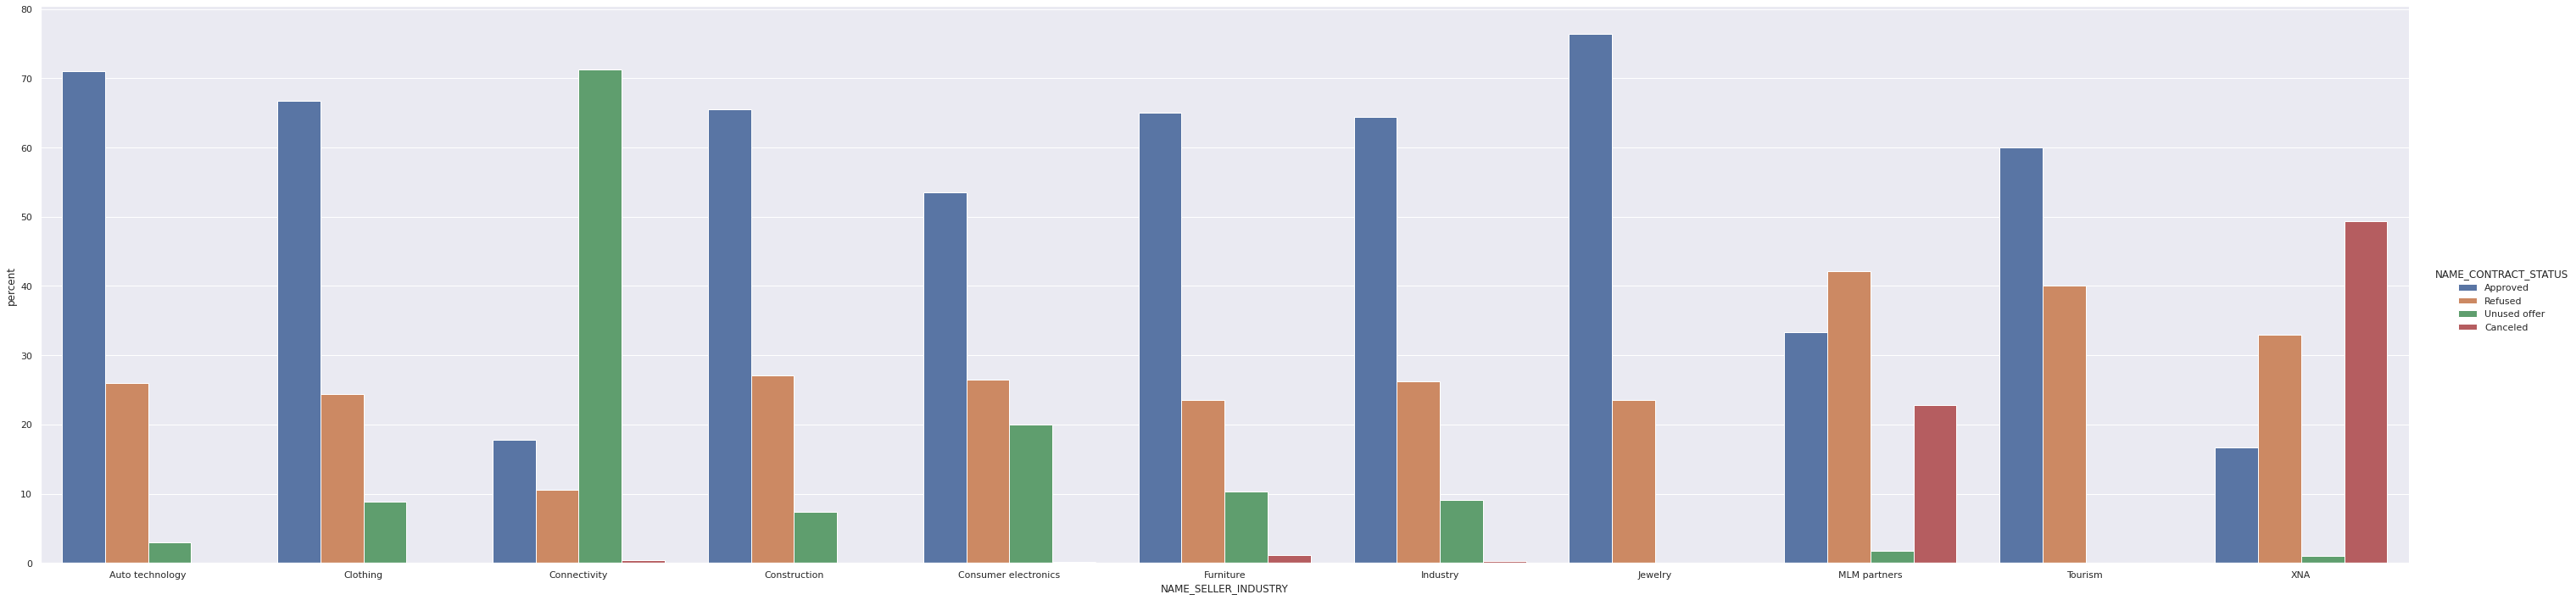

In [75]:
fig = plt.figure(figsize=(40,4)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
#ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
#df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
sns.countplot(x ='NAME_SELLER_INDUSTRY', data = sample_application,ax=ax0)
ax0.set_title('NAME_SELLER_INDUSTRY')
ax0.set_xlabel('NAME_SELLER_INDUSTRY')
ax0.set_ylabel('Frequency')



sns.set(color_codes=True)
x,y = 'NAME_SELLER_INDUSTRY', 'NAME_CONTRACT_STATUS'
(sample_application.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',height=10, aspect=4))

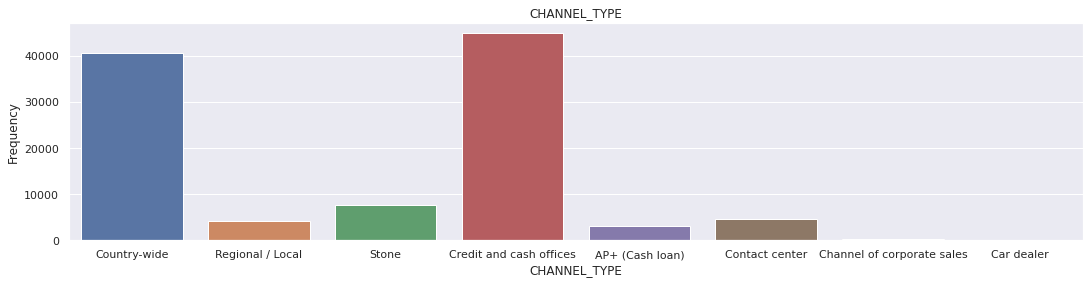

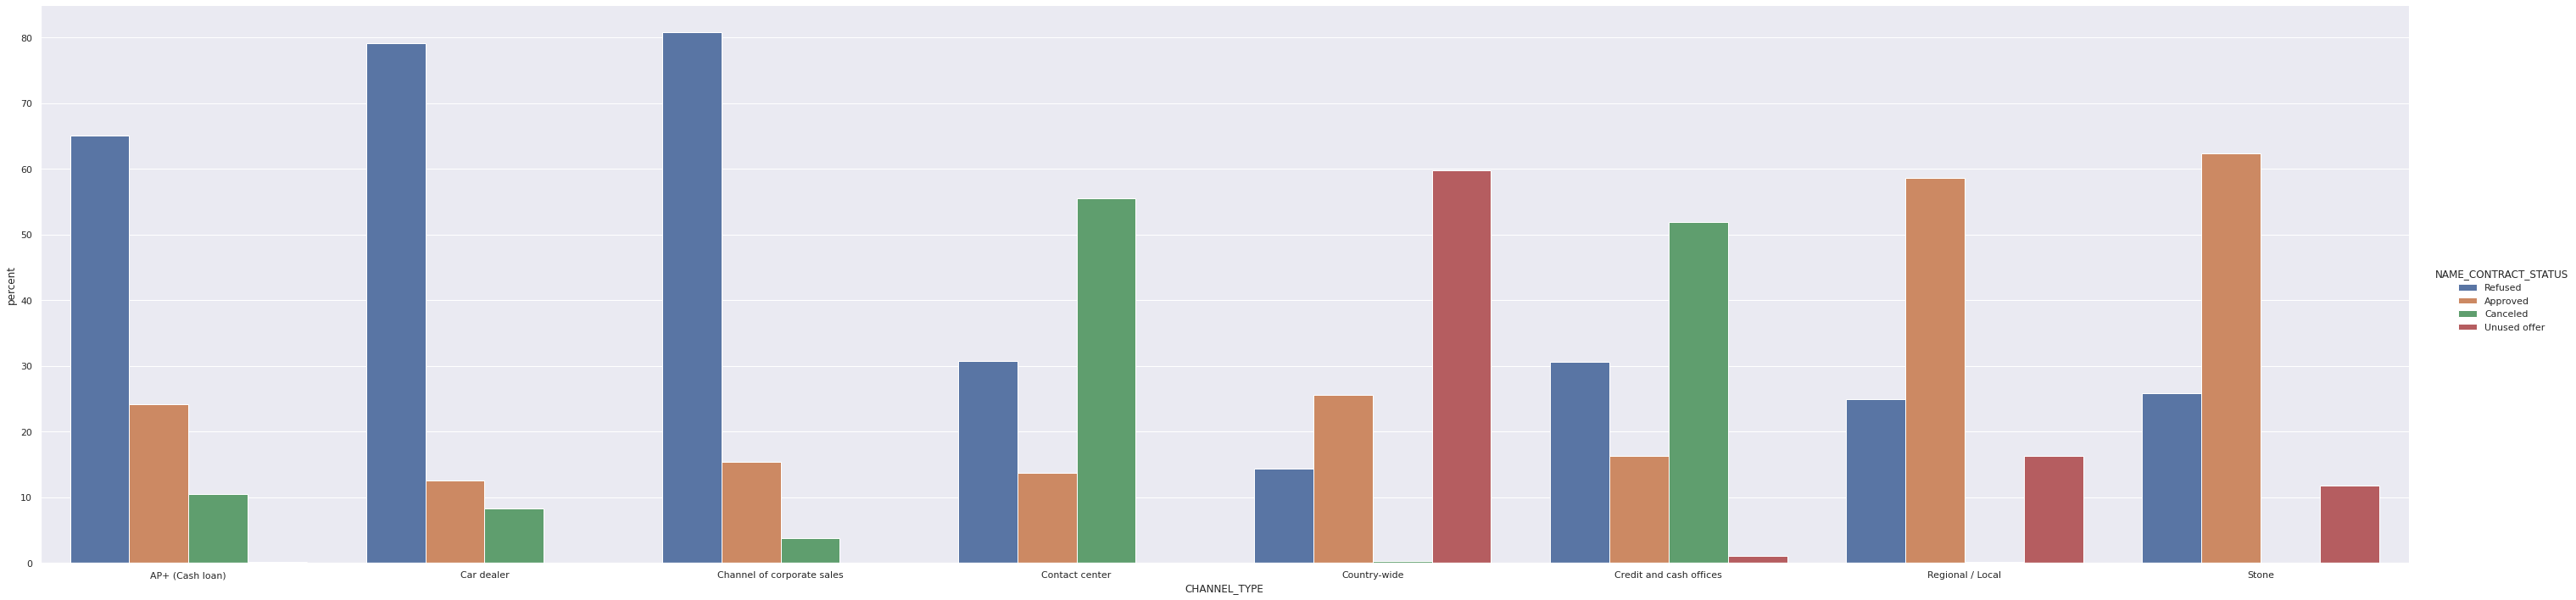

In [76]:
fig = plt.figure(figsize=(40,4)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
#ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
#df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
sns.countplot(x ='CHANNEL_TYPE', data = sample_application,ax=ax0)
ax0.set_title('CHANNEL_TYPE')
ax0.set_xlabel('CHANNEL_TYPE')
ax0.set_ylabel('Frequency')



sns.set(color_codes=True)
x,y = 'CHANNEL_TYPE', 'NAME_CONTRACT_STATUS'
(sample_application.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',height=10, aspect=4))

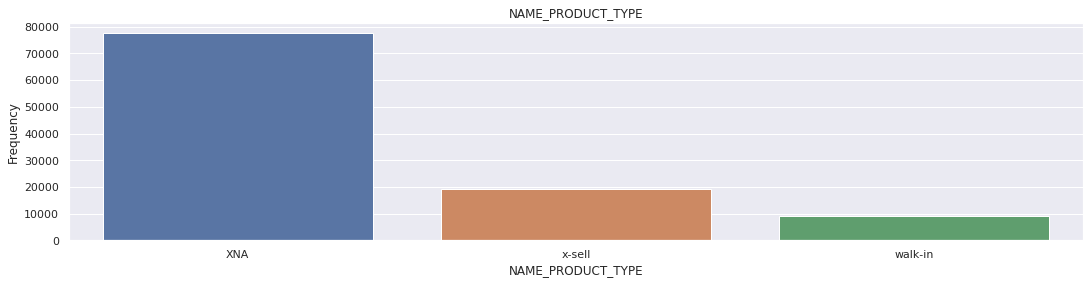

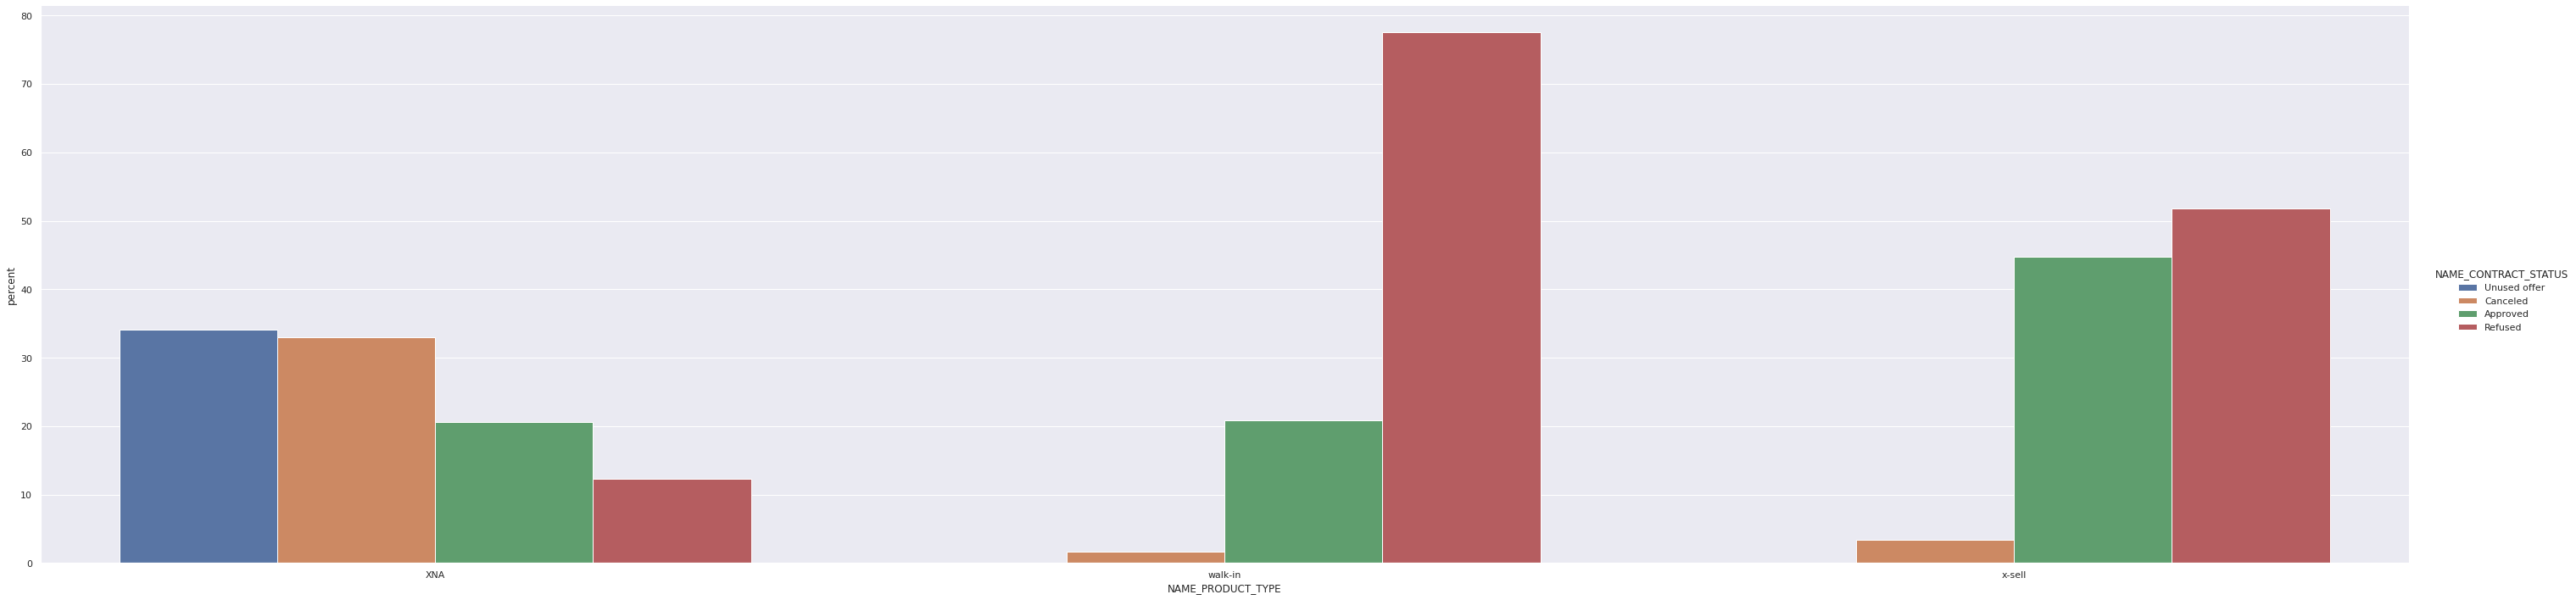

In [77]:
fig = plt.figure(figsize=(40,4)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
#ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
#df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
sns.countplot(x ='NAME_PRODUCT_TYPE', data = sample_application,ax=ax0)
ax0.set_title('NAME_PRODUCT_TYPE')
ax0.set_xlabel('NAME_PRODUCT_TYPE')
ax0.set_ylabel('Frequency')



sns.set(color_codes=True)
x,y = 'NAME_PRODUCT_TYPE', 'NAME_CONTRACT_STATUS'
(sample_application.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',height=10, aspect=4))

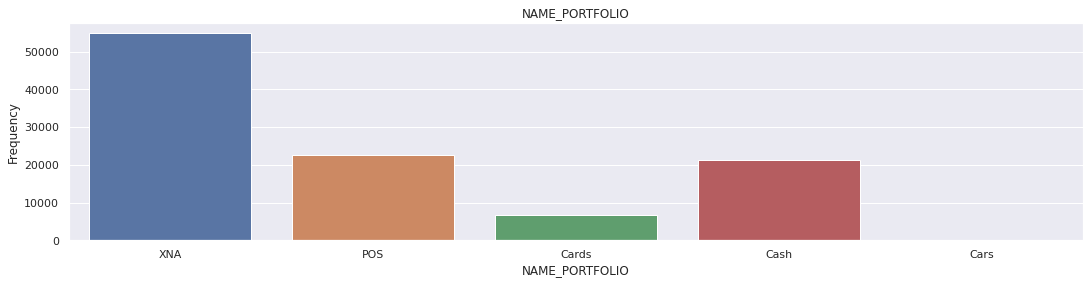

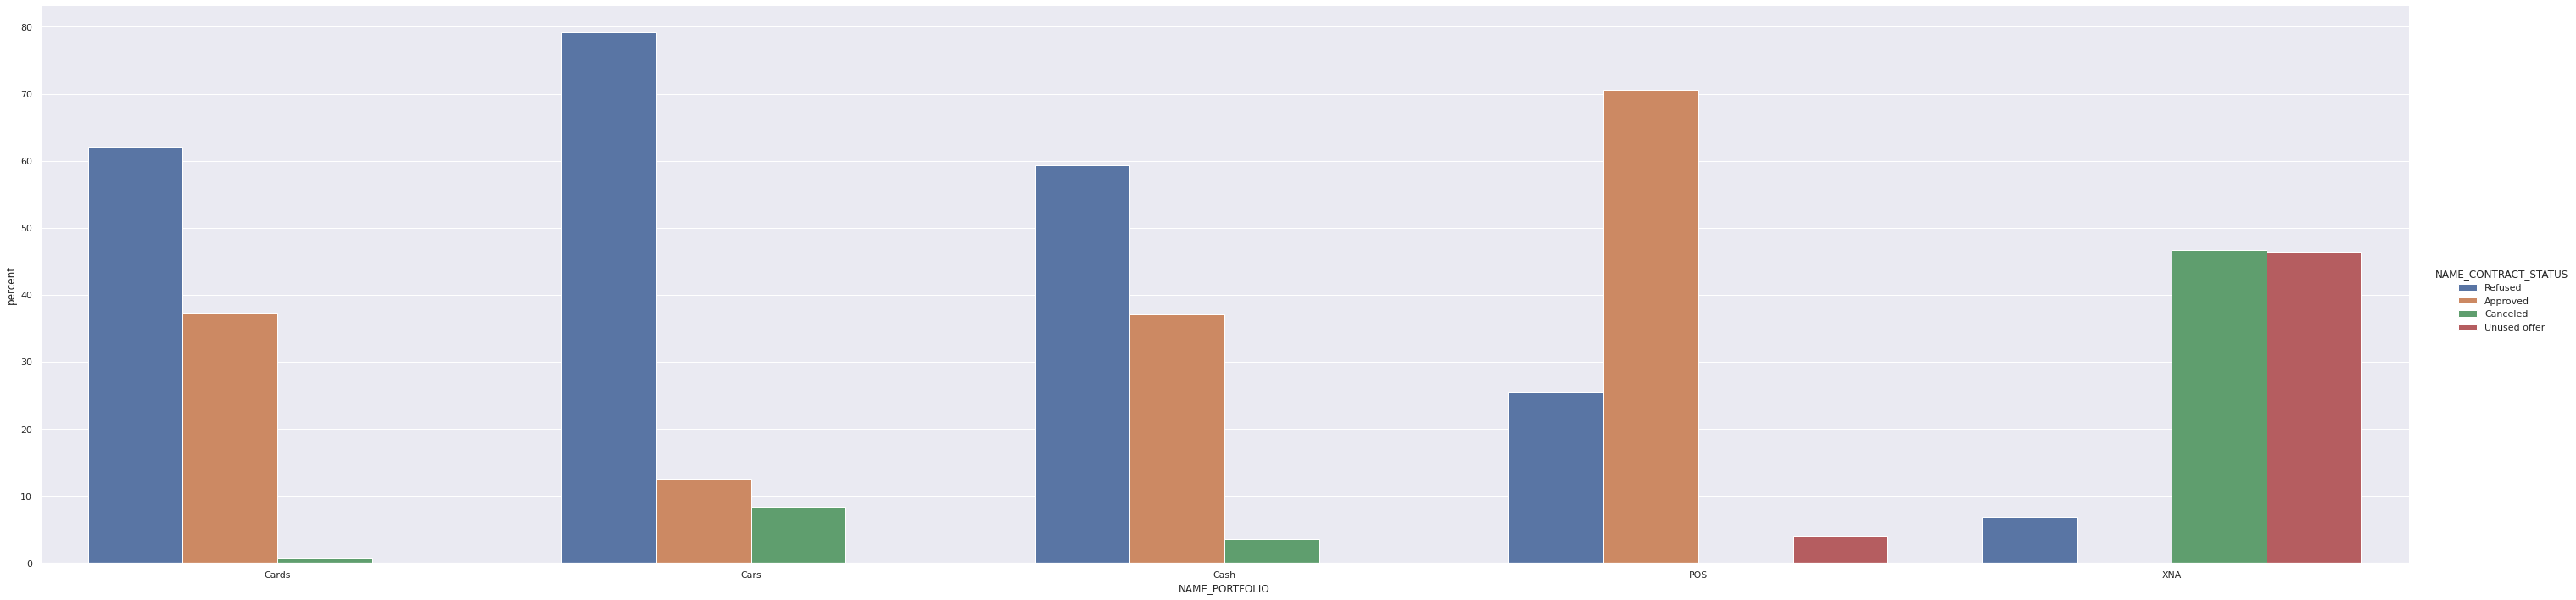

In [78]:
fig = plt.figure(figsize=(40,4)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
#ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
#df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
sns.countplot(x ='NAME_PORTFOLIO', data = sample_application,ax=ax0)
ax0.set_title('NAME_PORTFOLIO')
ax0.set_xlabel('NAME_PORTFOLIO')
ax0.set_ylabel('Frequency')



sns.set(color_codes=True)
x,y = 'NAME_PORTFOLIO', 'NAME_CONTRACT_STATUS'
(sample_application.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',height=10, aspect=4))

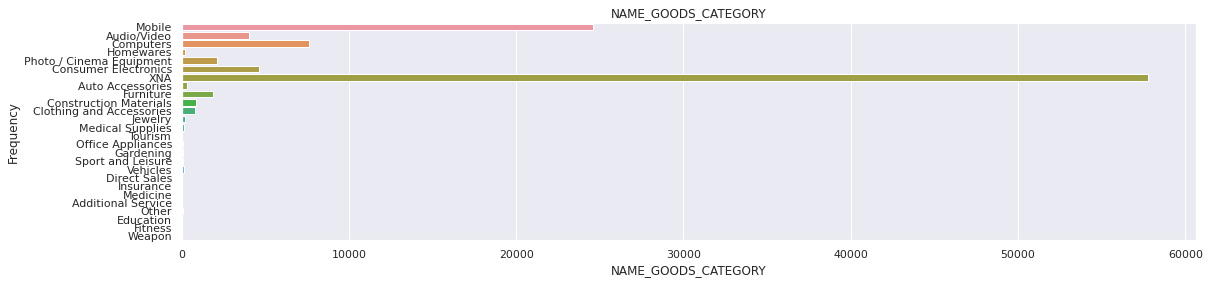

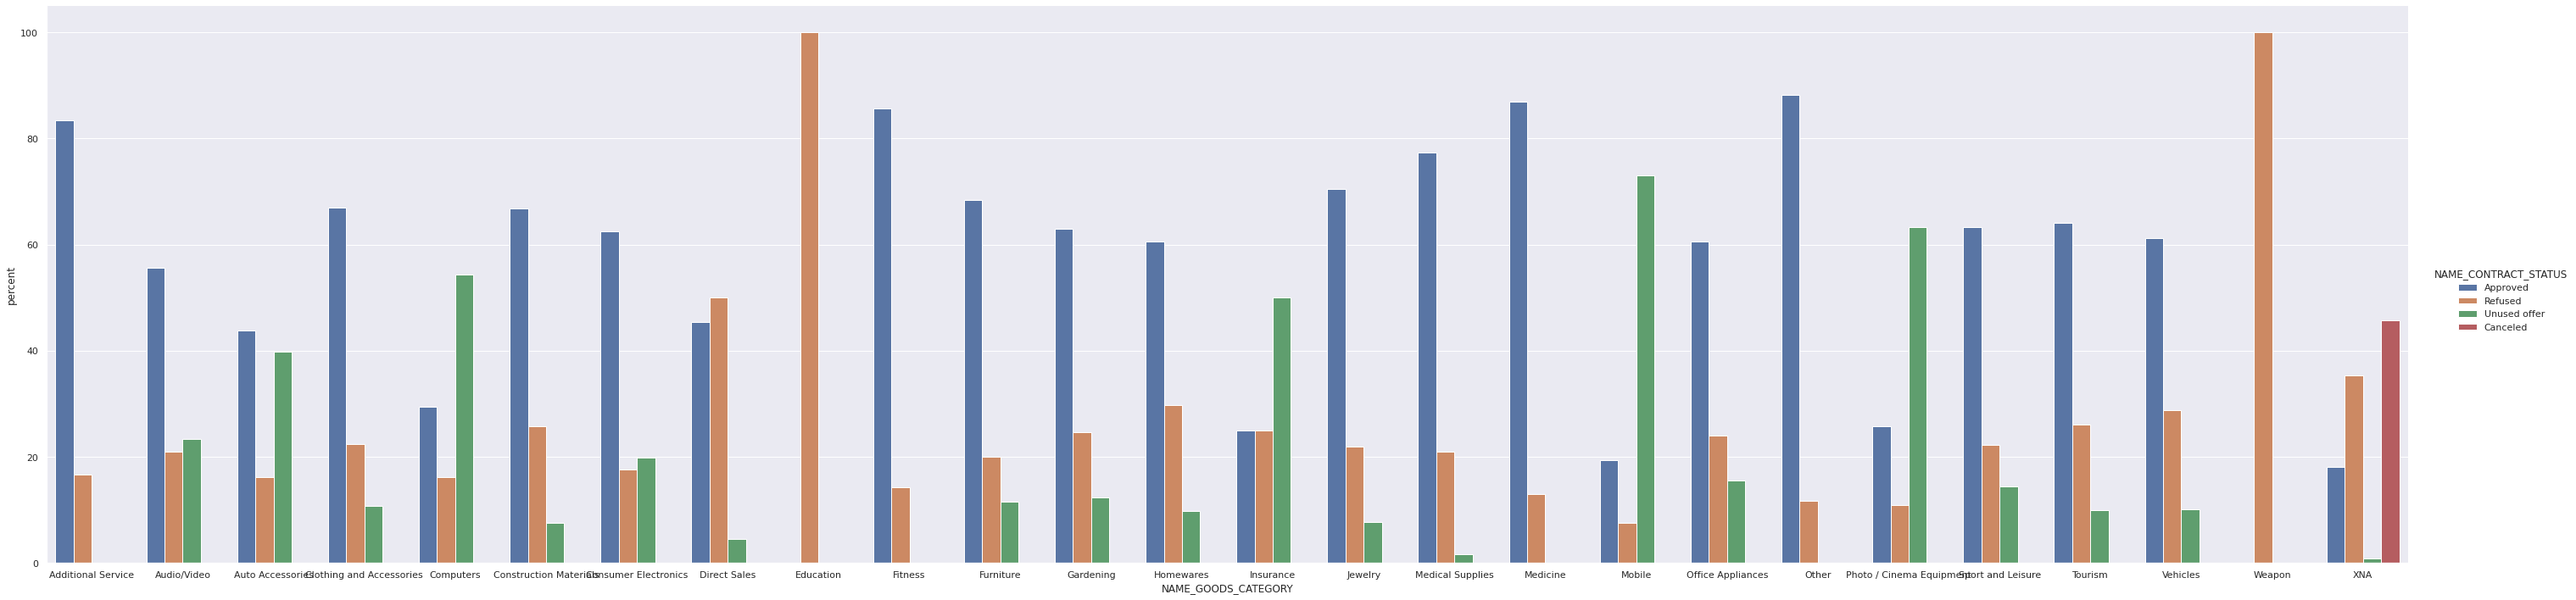

In [79]:
fig = plt.figure(figsize=(40,4)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
#ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
#df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
sns.countplot(y ='NAME_GOODS_CATEGORY', data = sample_application,ax=ax0)
ax0.set_title('NAME_GOODS_CATEGORY')
ax0.set_xlabel('NAME_GOODS_CATEGORY')
ax0.set_ylabel('Frequency')



sns.set(color_codes=True)
x,y = 'NAME_GOODS_CATEGORY', 'NAME_CONTRACT_STATUS'
(sample_application.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',height=10, aspect=4))

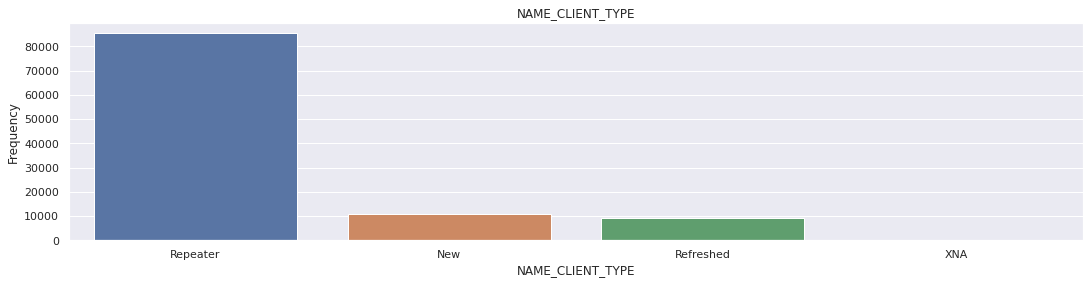

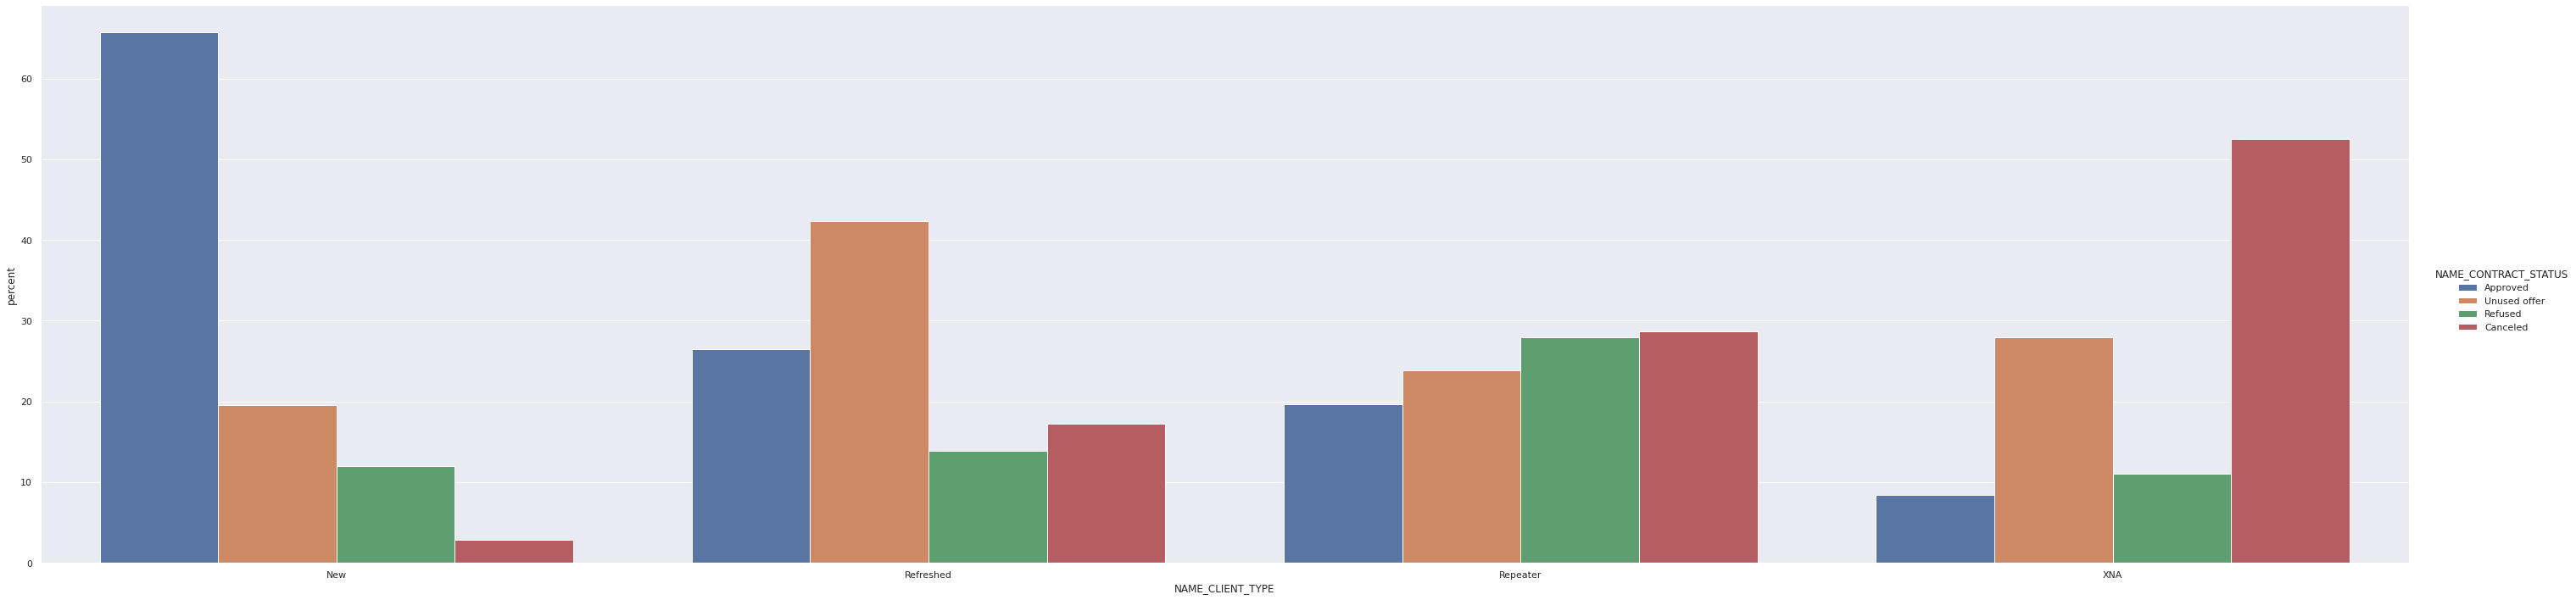

In [80]:
fig = plt.figure(figsize=(40,4)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
#ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
#df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
sns.countplot(x ='NAME_CLIENT_TYPE', data = sample_application,ax=ax0)
ax0.set_title('NAME_CLIENT_TYPE')
ax0.set_xlabel('NAME_CLIENT_TYPE')
ax0.set_ylabel('Frequency')



sns.set(color_codes=True)
x,y = 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS'
(sample_application.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',height=10, aspect=4))

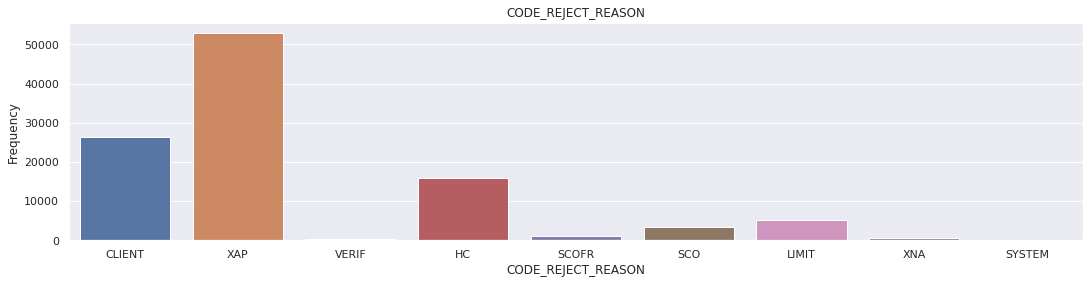

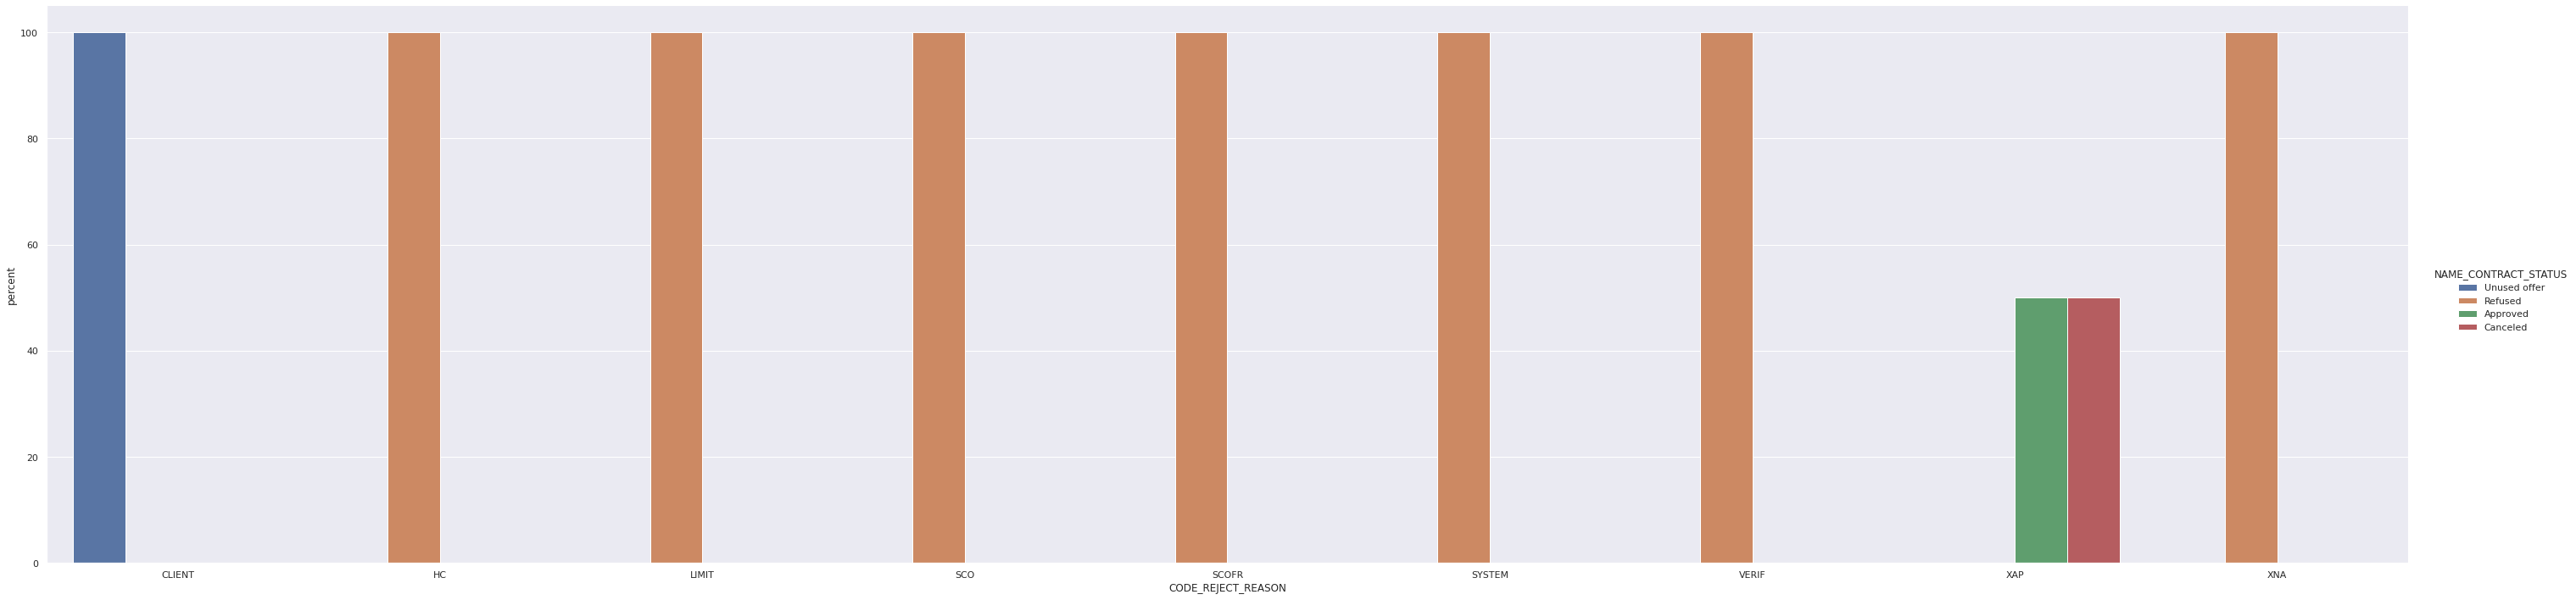

In [81]:
fig = plt.figure(figsize=(40,4)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
#ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
#df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
sns.countplot(x ='CODE_REJECT_REASON', data = sample_application,ax=ax0)
ax0.set_title('CODE_REJECT_REASON')
ax0.set_xlabel('CODE_REJECT_REASON')
ax0.set_ylabel('Frequency')



sns.set(color_codes=True)
x,y = 'CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS'
(sample_application.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',height=10, aspect=4))

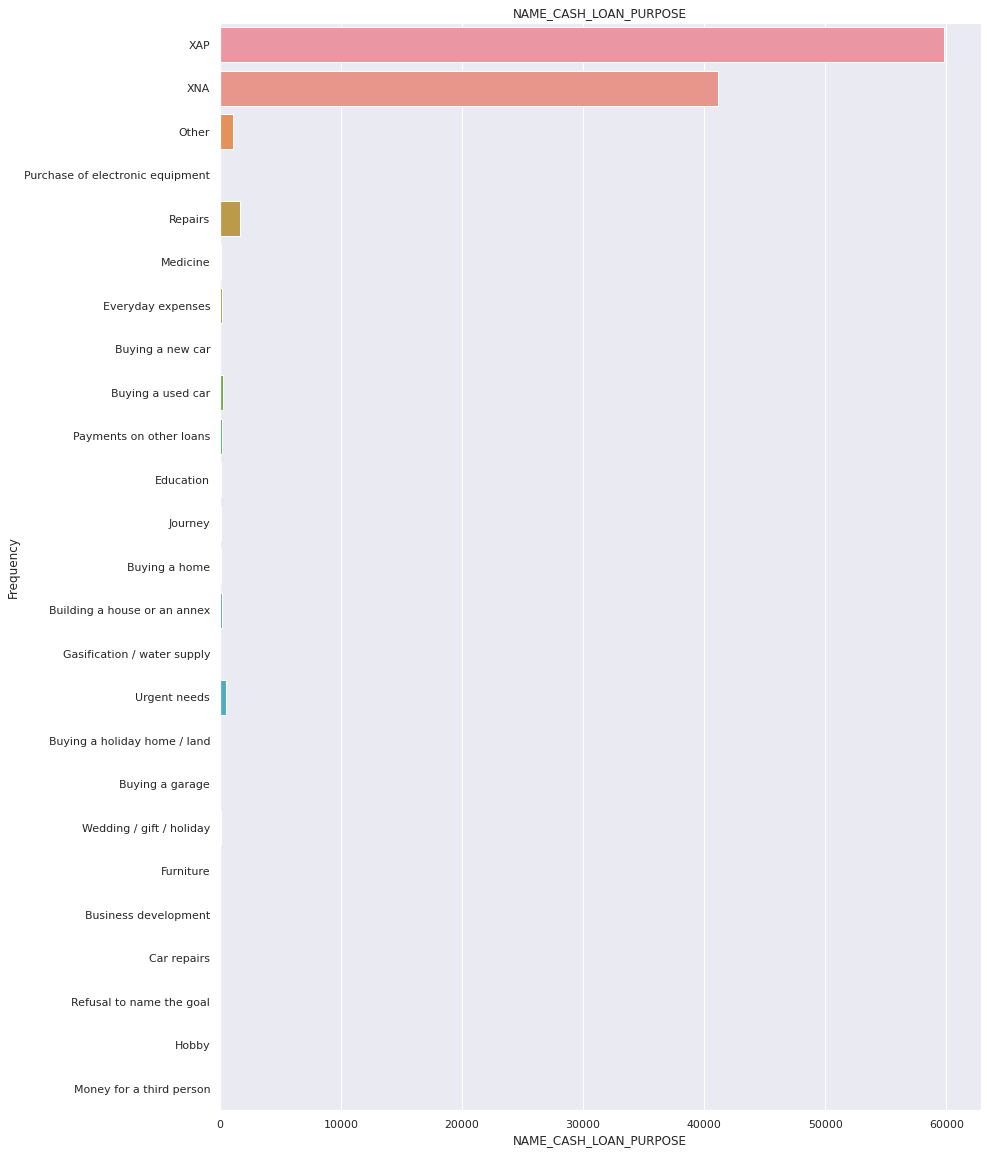

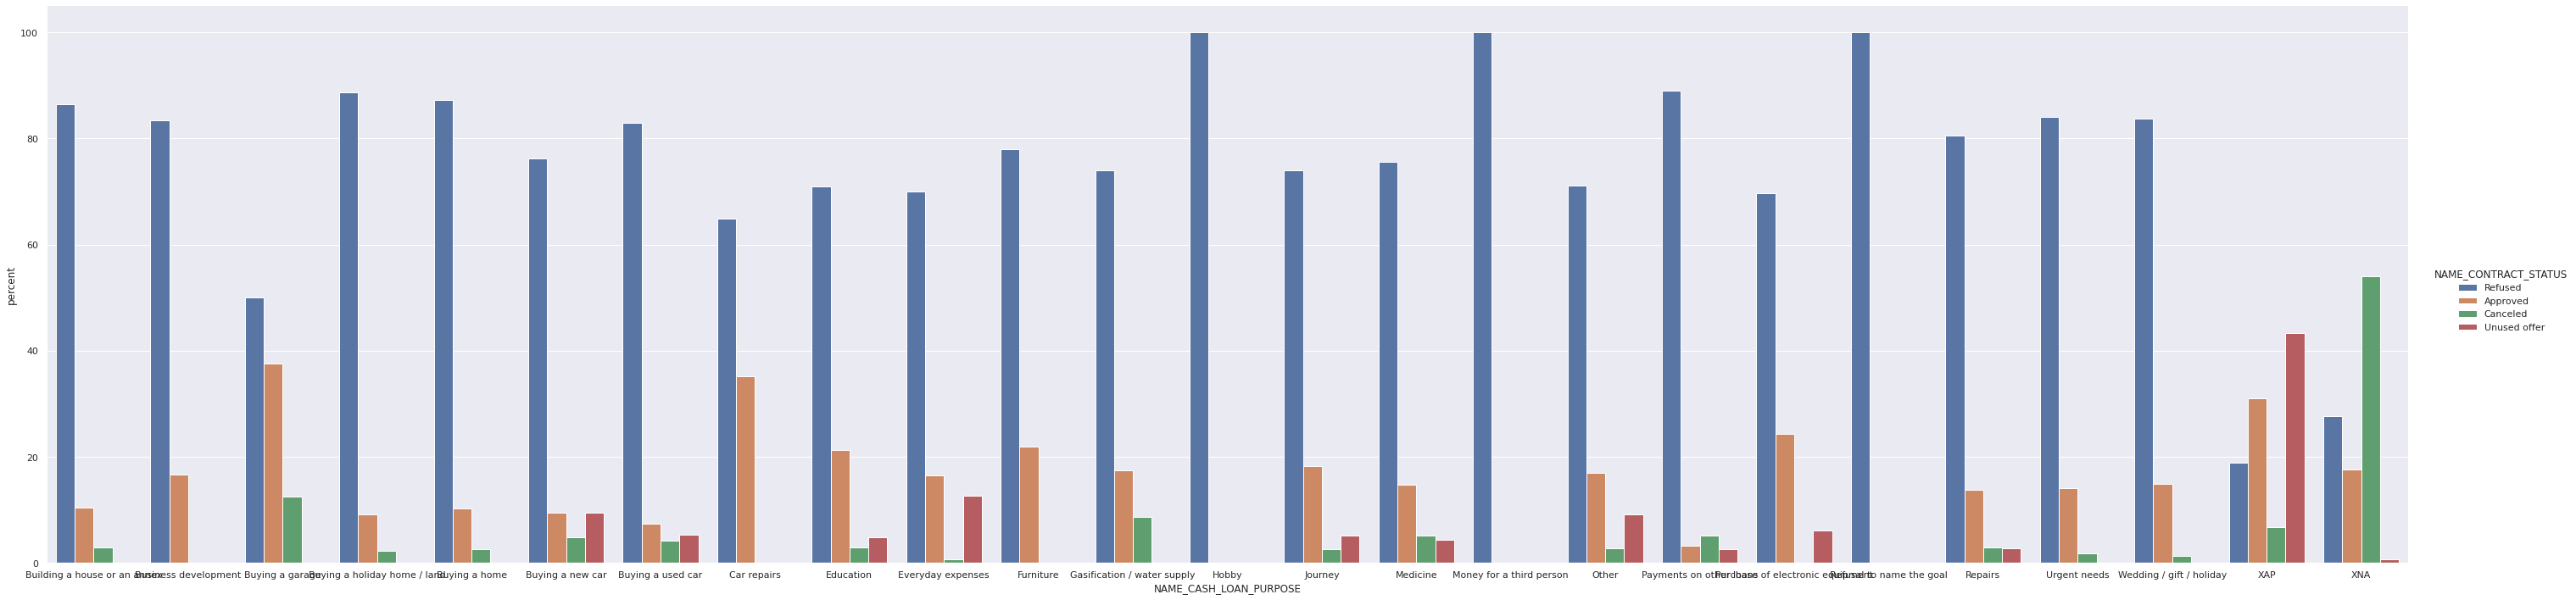

In [82]:
fig = plt.figure(figsize=(30,20)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
#ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
#df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
sns.countplot(y ='NAME_CASH_LOAN_PURPOSE', data = sample_application,ax=ax0)
ax0.set_title('NAME_CASH_LOAN_PURPOSE')
ax0.set_xlabel('NAME_CASH_LOAN_PURPOSE')
ax0.set_ylabel('Frequency')



sns.set(color_codes=True)
x,y = 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS'
(sample_application.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',height=10, aspect=4))

In [83]:
cat

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

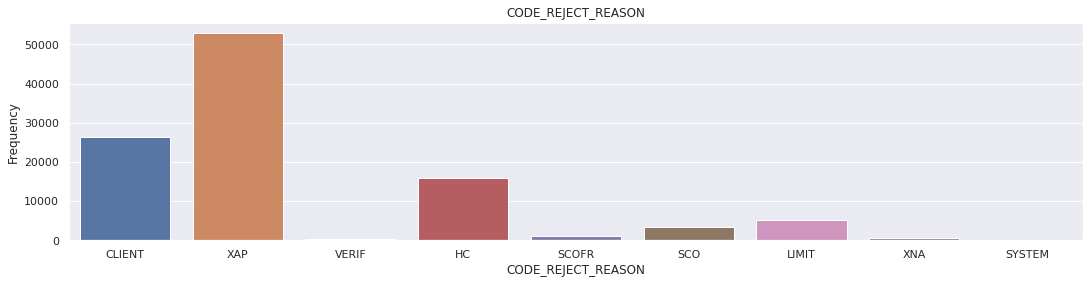

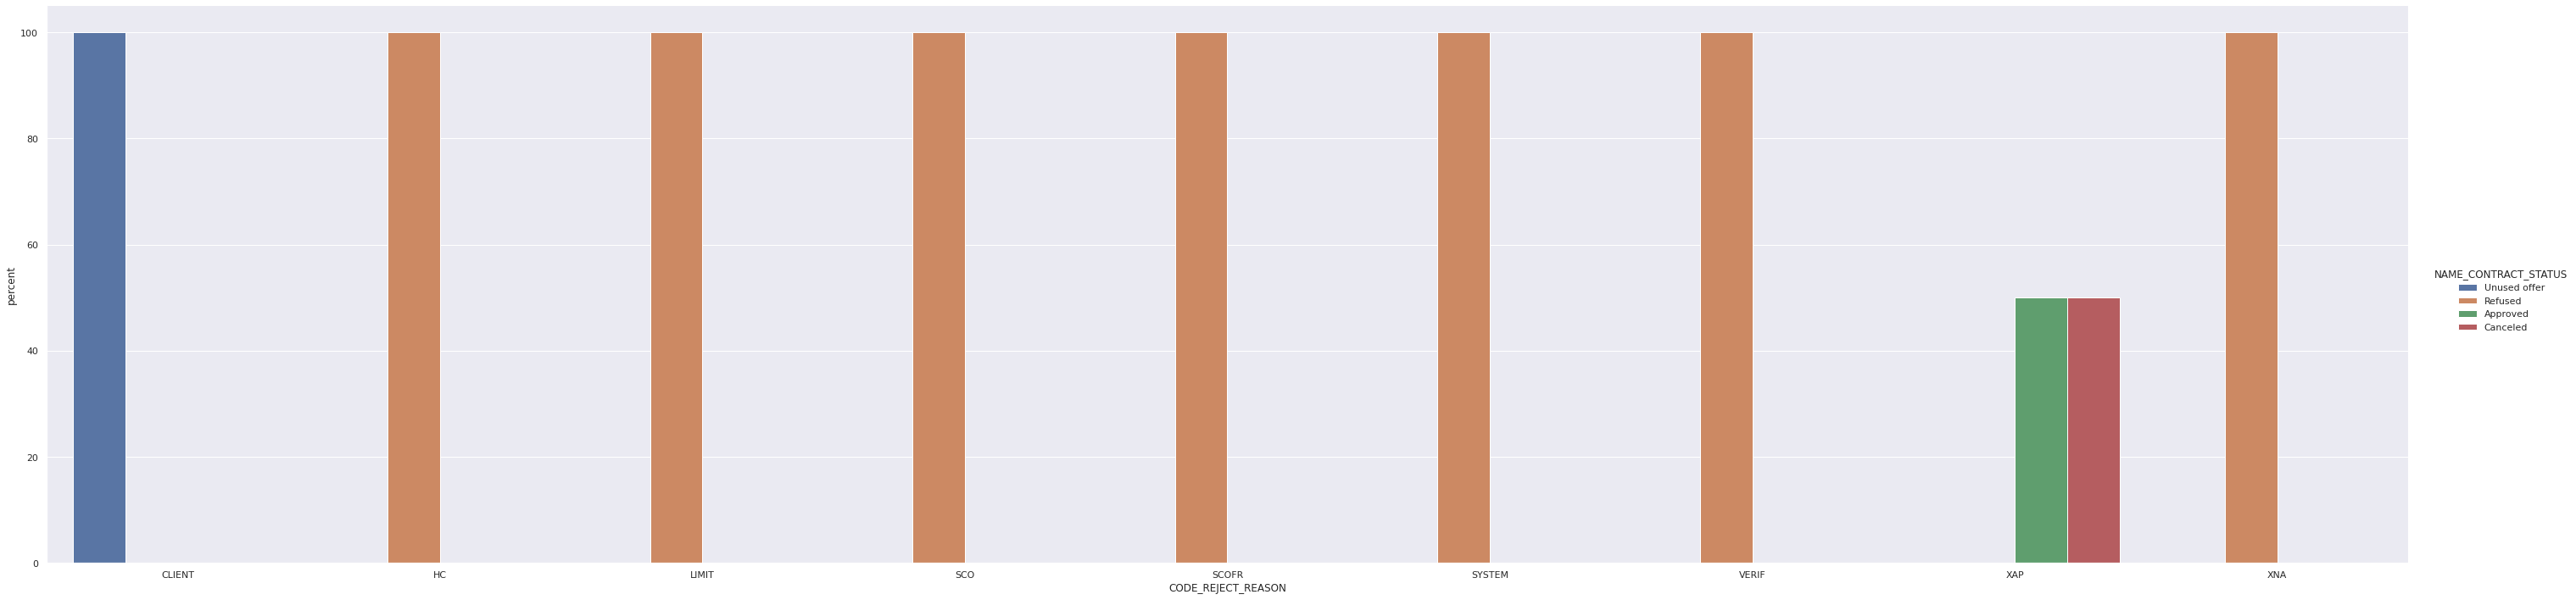

In [84]:
fig = plt.figure(figsize=(40,4)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
#ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
#df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
sns.countplot(x ='CODE_REJECT_REASON', data = sample_application,ax=ax0)
ax0.set_title('CODE_REJECT_REASON')
ax0.set_xlabel('CODE_REJECT_REASON')
ax0.set_ylabel('Frequency')



sns.set(color_codes=True)
x,y = 'CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS'
(sample_application.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',height=10, aspect=4))

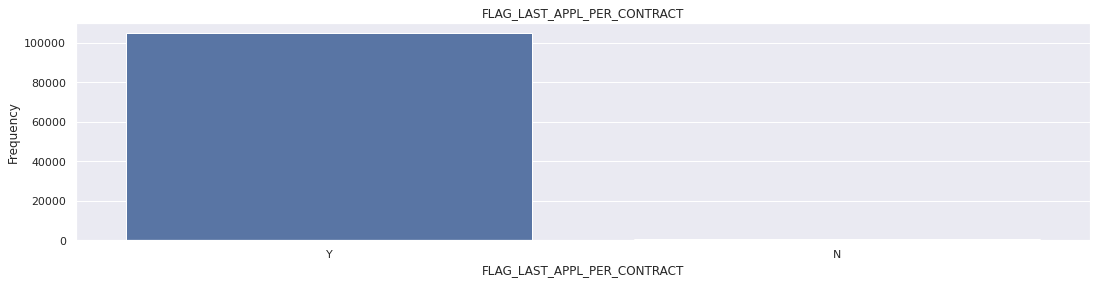

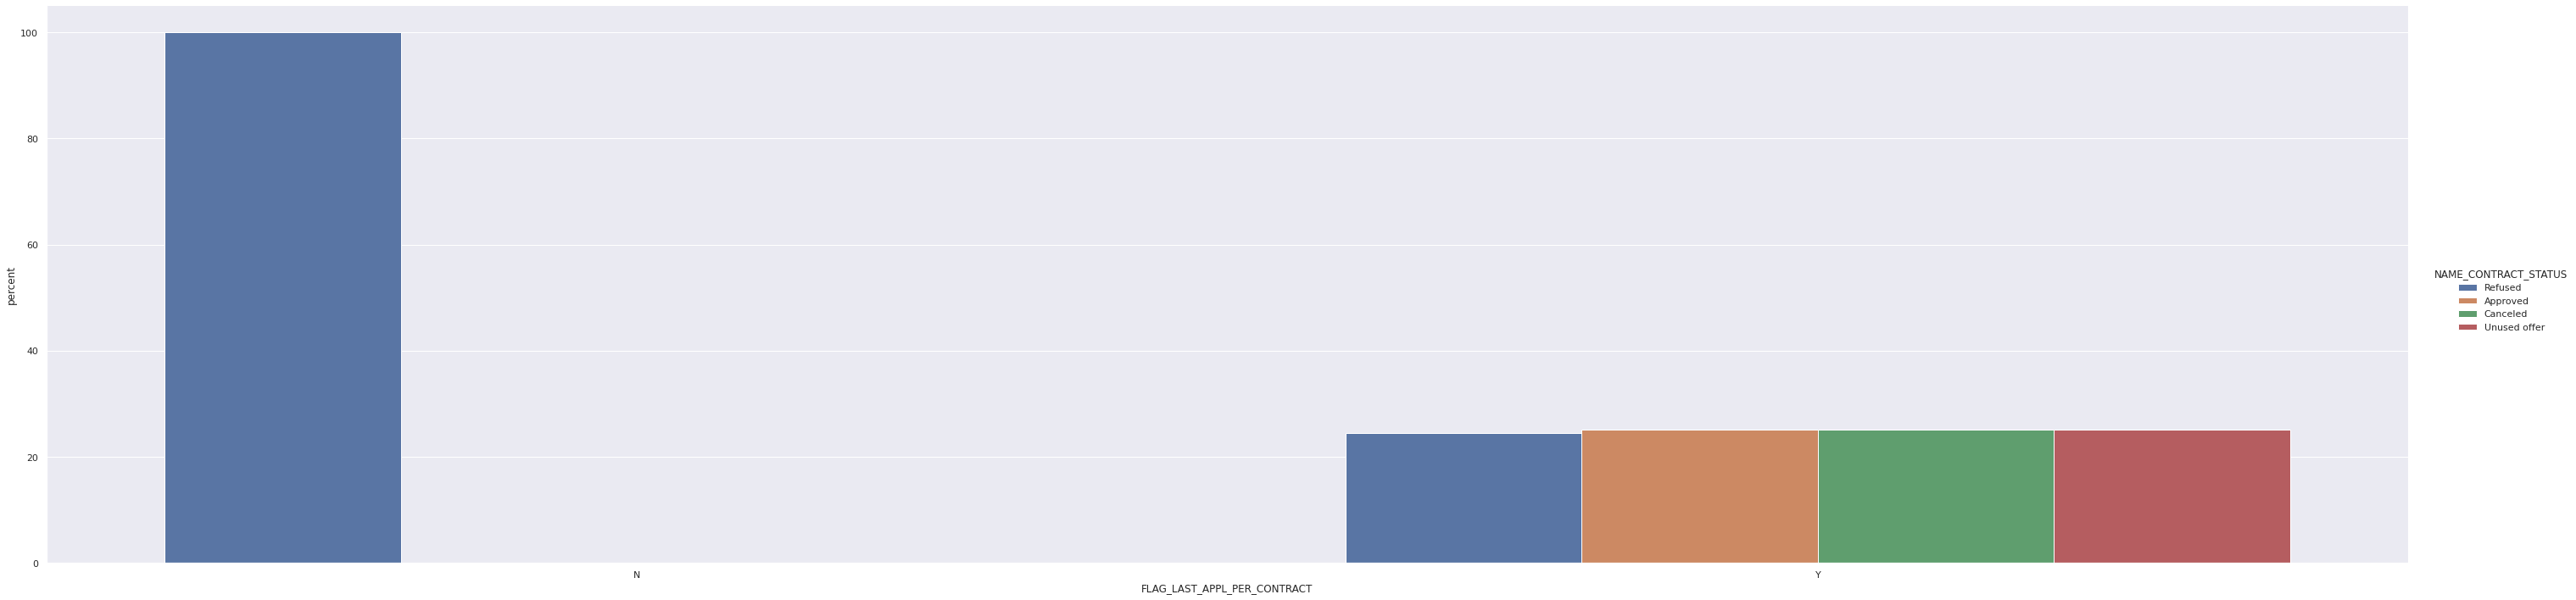

In [85]:
fig = plt.figure(figsize=(40,4)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
#ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
#df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
sns.countplot(x ='FLAG_LAST_APPL_PER_CONTRACT', data = sample_application,ax=ax0)
ax0.set_title('FLAG_LAST_APPL_PER_CONTRACT')
ax0.set_xlabel('FLAG_LAST_APPL_PER_CONTRACT')
ax0.set_ylabel('Frequency')



sns.set(color_codes=True)
x,y = 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CONTRACT_STATUS'
(sample_application.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',height=10, aspect=4))

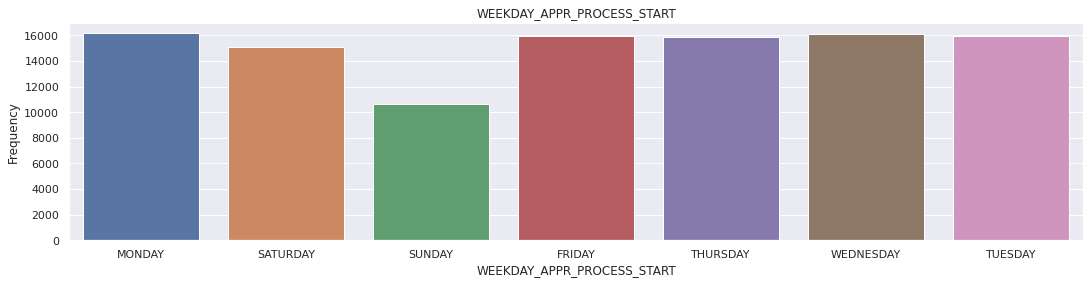

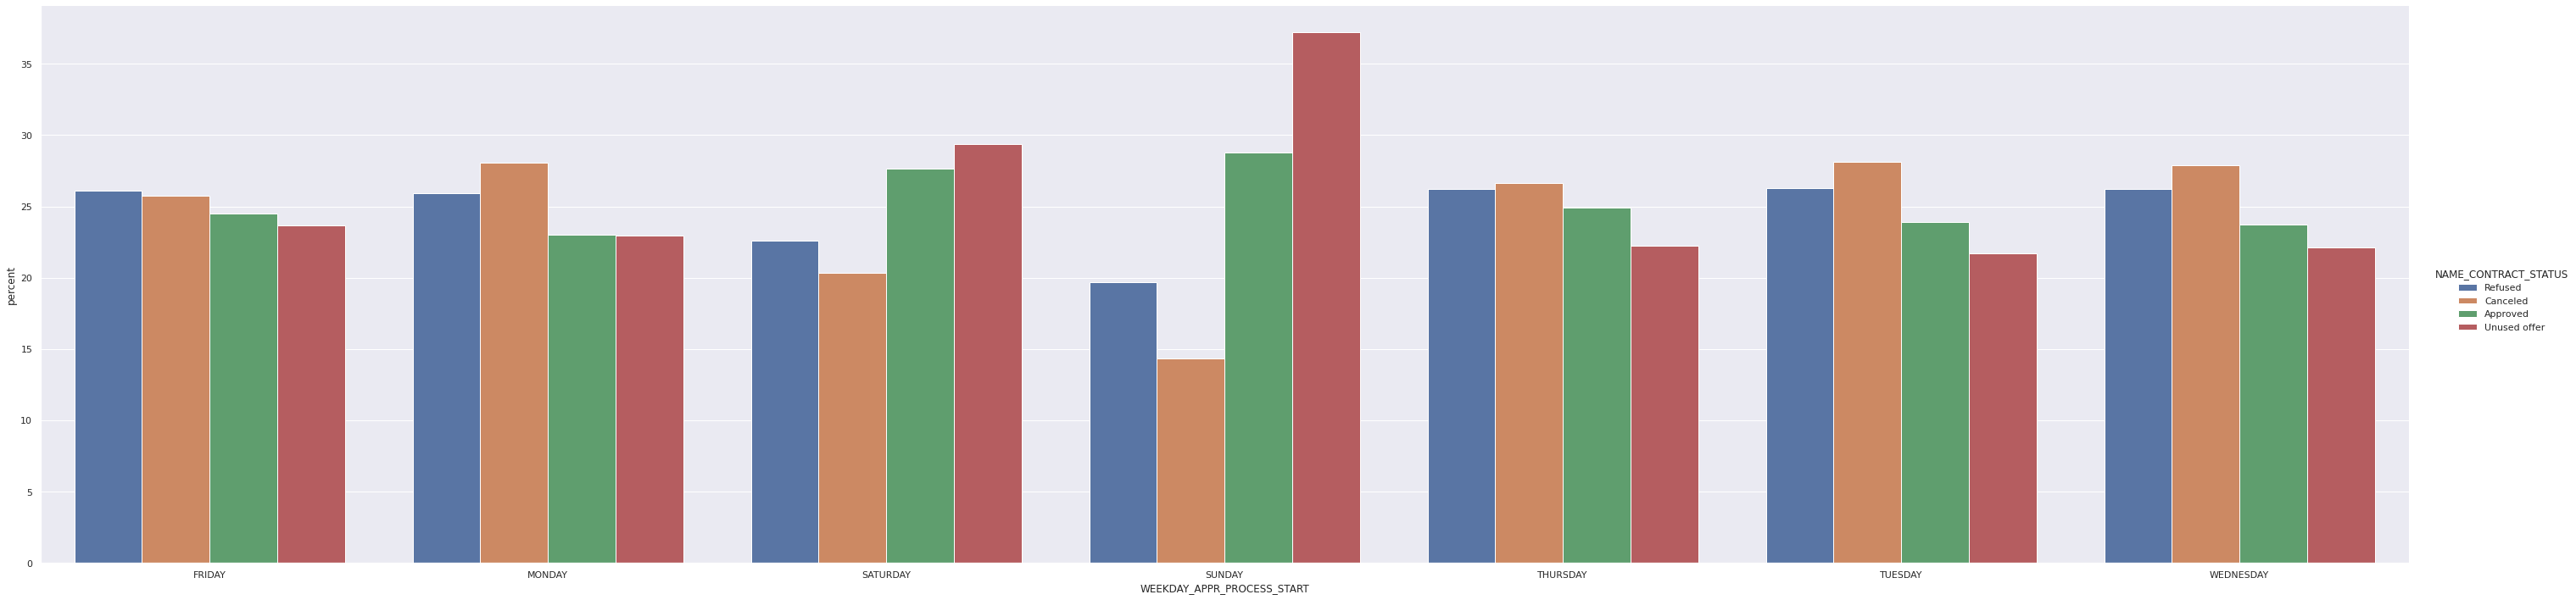

In [86]:
fig = plt.figure(figsize=(40,4)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
#ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
#df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
sns.countplot(x = 'WEEKDAY_APPR_PROCESS_START', data = sample_application,ax=ax0)
ax0.set_title( 'WEEKDAY_APPR_PROCESS_START')
ax0.set_xlabel( 'WEEKDAY_APPR_PROCESS_START')
ax0.set_ylabel('Frequency')



sns.set(color_codes=True)
x,y =  'WEEKDAY_APPR_PROCESS_START', 'NAME_CONTRACT_STATUS'
(sample_application.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',height=10, aspect=4))

  # CONCLUSION

The features for estimating the target are : </br>


1.   CODE_REJECT_REASON
2.   NAME_CASH_LOAN_PURPOSE
3.   NAME_GOODS_CATEGORY
4.   NAME_PORTFOLIO
5.   NAME_PRODUCT_TYPE 
6.   CHANNEL_TYPE
7.   NAME_YIELD_GROUP
8.   PRODUCT_COMBINATION
9.   AMT_ANNUITY

